In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas_profiling import ProfileReport
from tsfresh import extract_features
import seaborn as sns
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm
from tslearn.clustering import TimeSeriesKMeans

In [2]:
def plot(title, *args):
    plt.figure(figsize=(20, 10), dpi=200)
    for arg in args:
        plt.plot(arg)
    plt.title(title)
    plt.show()

In [104]:
def plot_claster(df, cluster_num, clasters, index):
    res = []
    for cluster in range(cluster_num):
        res.append(np.where(clasters == cluster)[0][:200])
    ind = np.array(res)

    plt.figure(figsize=(30, 20))
    for i in enumerate(ind):
        plt.plot(df.iloc[:, i[1]], c='black', alpha=0.1)
    plt.plot(df.iloc[:, ind[index]], c='red')
    plt.show()

In [4]:
pre_df = pd.read_csv('st_ts.txt', index_col='id')
pre_df.head()
sns.set()

In [5]:
df = pre_df.T
df.index = pd.to_datetime(df.index)
df.columns = [f'item{x}' for x in df.columns]

In [6]:
df.shape

(106, 58424)

In [7]:
df.head()

item0  item1  item2  item3  item4  item5  item6  item7  item8  \
2017-08-28      2      3      0      0      1      0      0      0      1   
2017-09-04      3      2      0      5      1      0      0      4      1   
2017-09-11      0      0      0      3      1      0      0      7      1   
2017-09-18      0      1      0      2     15      0      0      7      1   
2017-09-25      2      0      0      1      0      0      0      6      8   

            item9        ...         item163208760122  item163208760123  \
2017-08-28      0        ...                        1                 0   
2017-09-04      0        ...                        0                 0   
2017-09-11      0        ...                        0                 1   
2017-09-18      1        ...                        0                 0   
2017-09-25      0        ...                        0                 0   

            item163208760124  item163208760125  item163208760126  \
2017-08-28                 0                 0                 0   
2017-09-04                 0                 0                 0   
2017-09-11                 0                 0                 2   
2017-09-18                 0                 1                 0   
2017-09-25                 1                 0                 0   

            item163208760127  item163208760128  item163208760129  \
2017-08-28                 1                 0                 0   
2017-09-04                 0                 2                 0   
2017-09-11                 0                 7                 0   
2017-09-18                 1                 1                 0   
2017-09-25                 0                 0                 0   

            item163208760130  item163208760131  
2017-08-28                 0                 0  
2017-09-04                 0                 0  
2017-09-11                 0                 0  
2017-09-18                 0                 0  
2017-09-25                 0                 0  

[5 rows x 58424 columns]

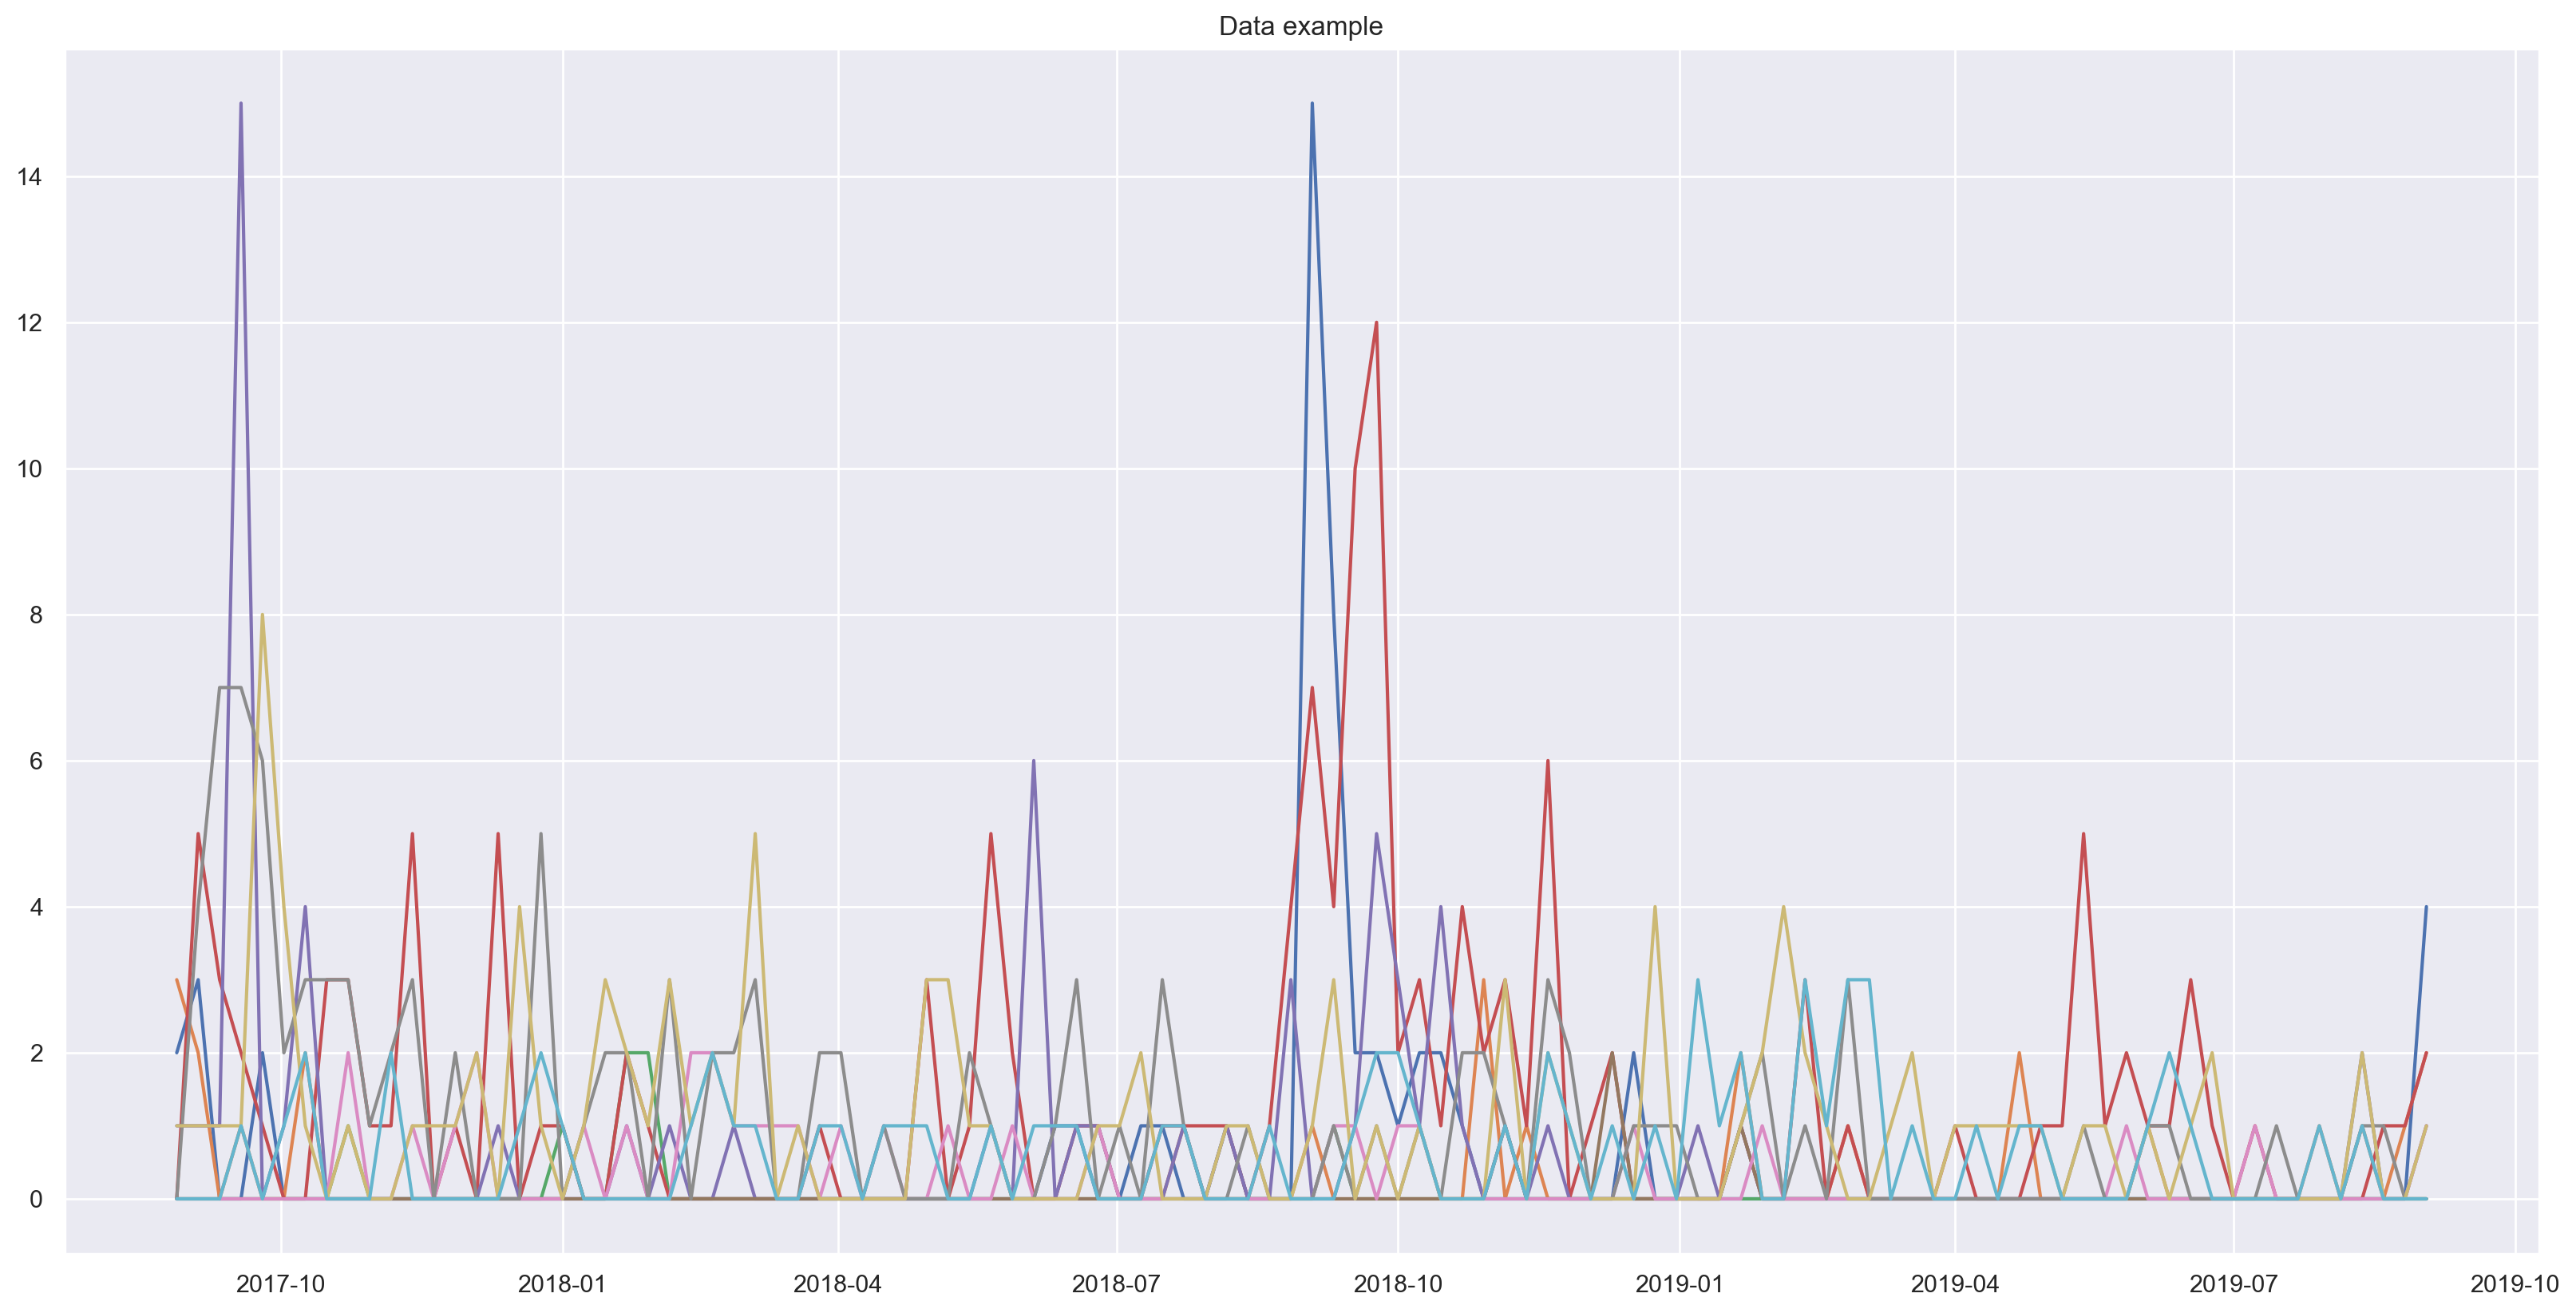

In [8]:
plot('Data example', df[df.columns[:10]])

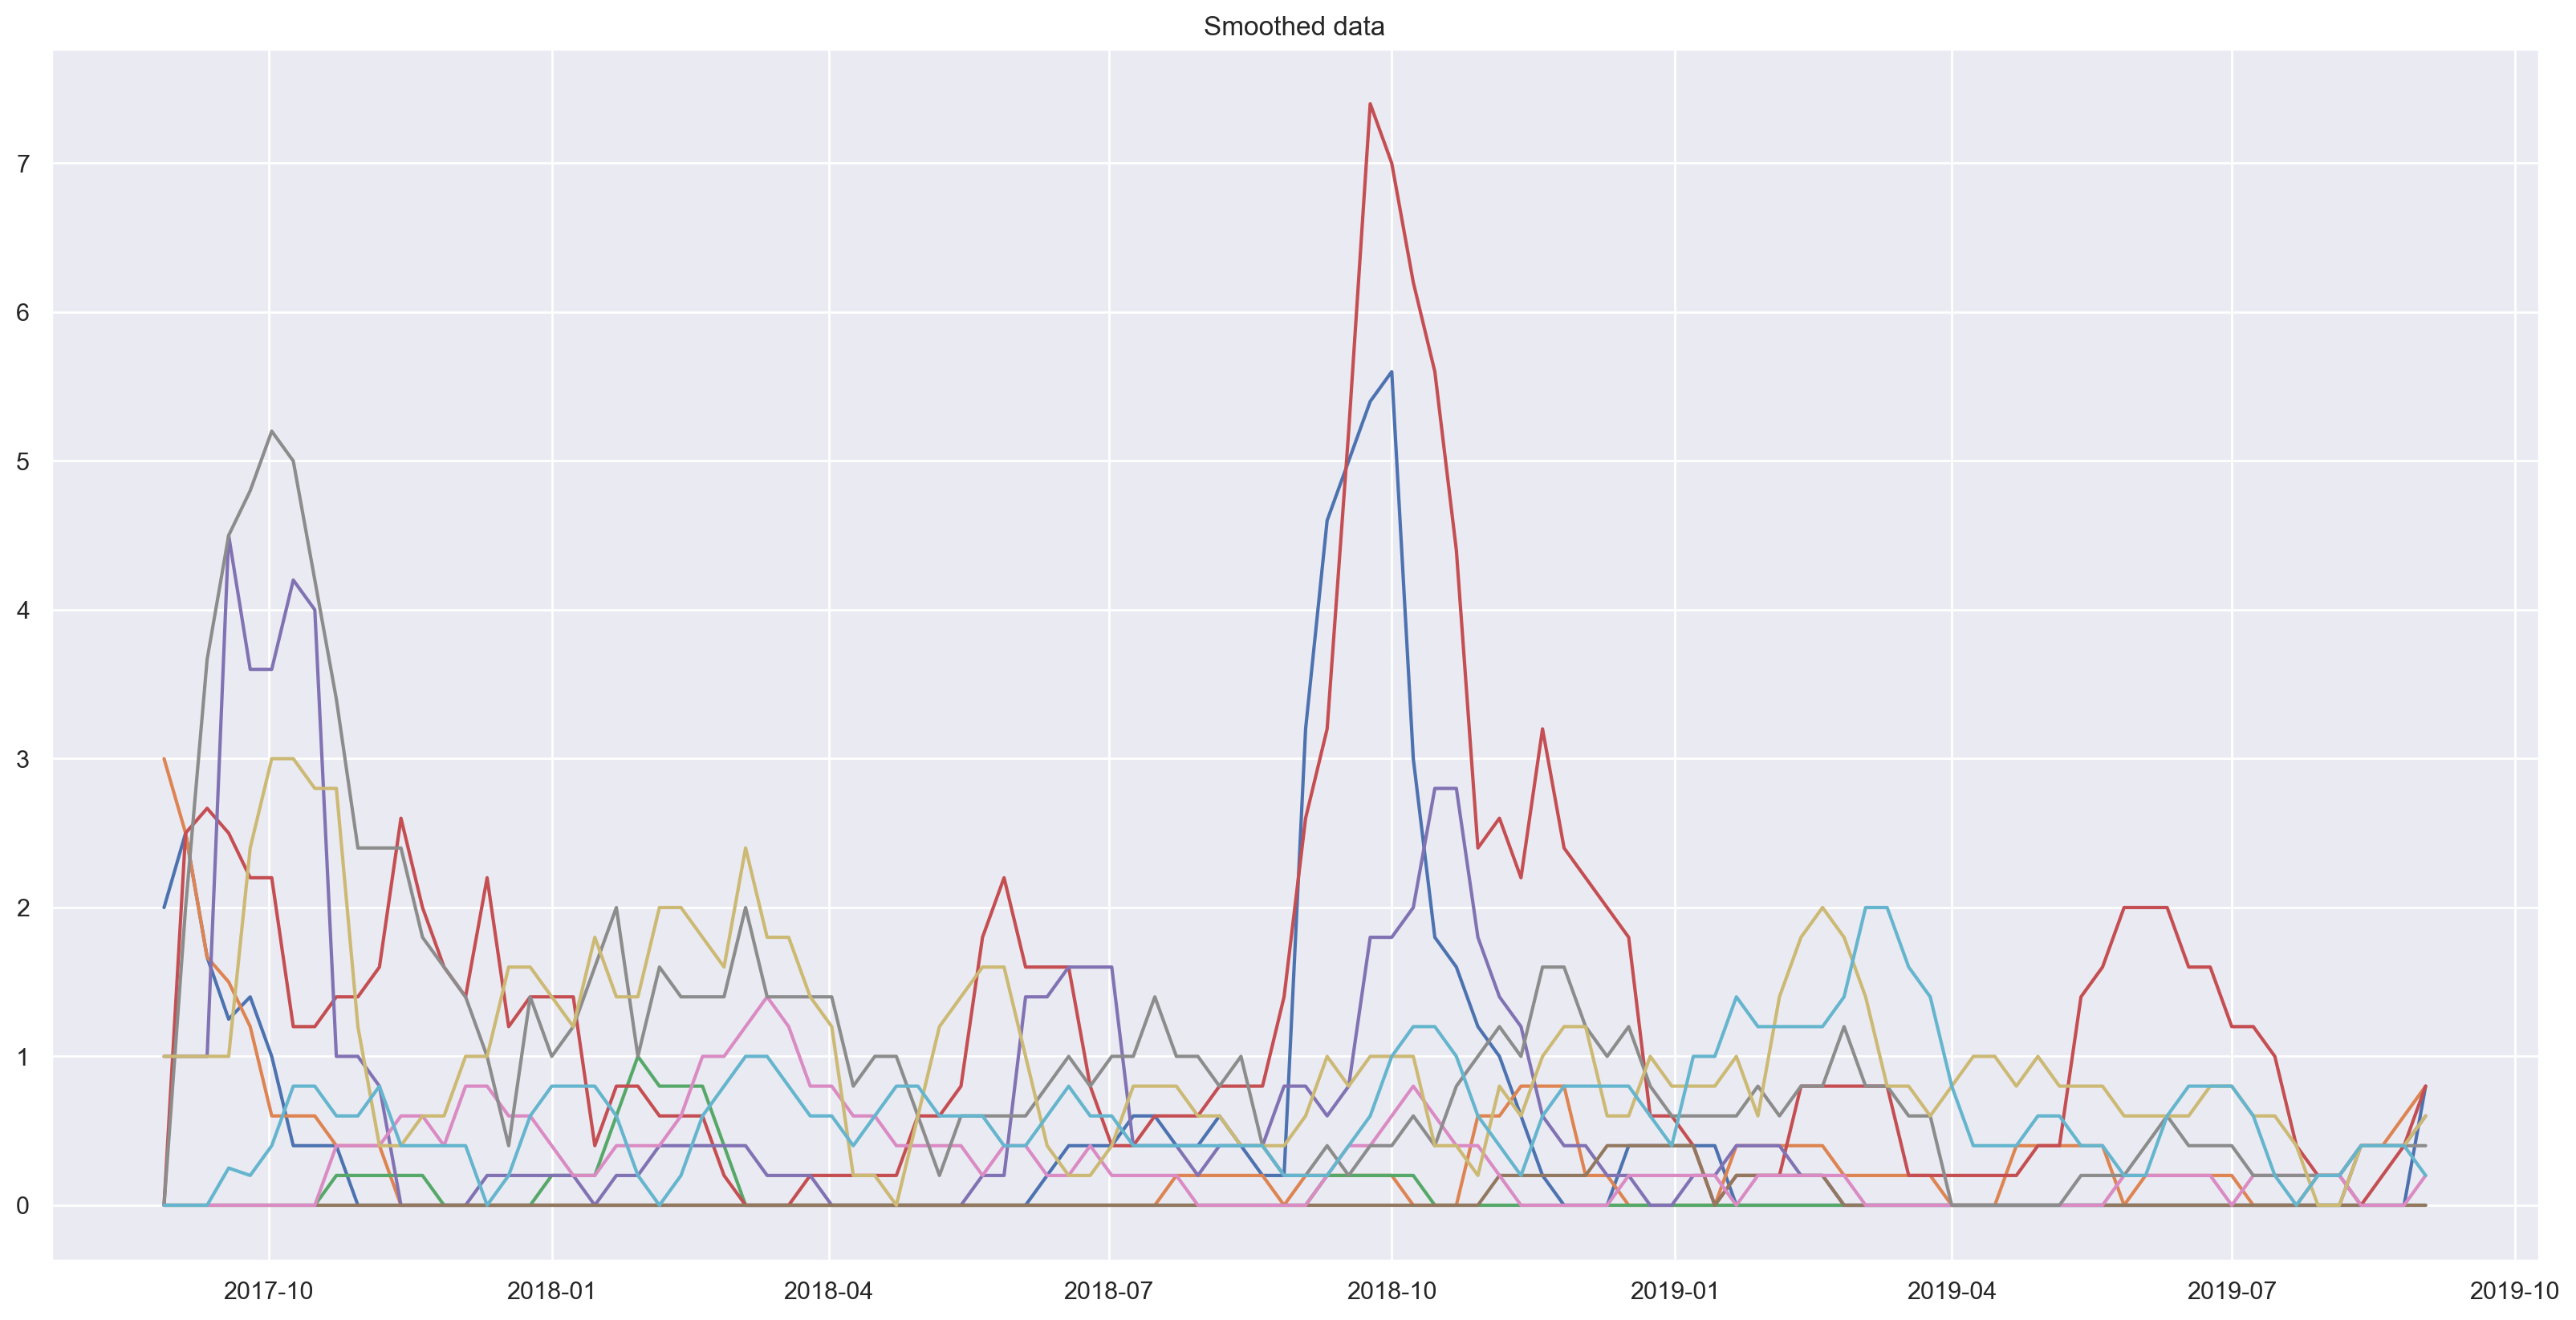

In [9]:
rolling_df = df.rolling('30D').mean()

plot('Smoothed data', rolling_df[rolling_df.columns[:10]])

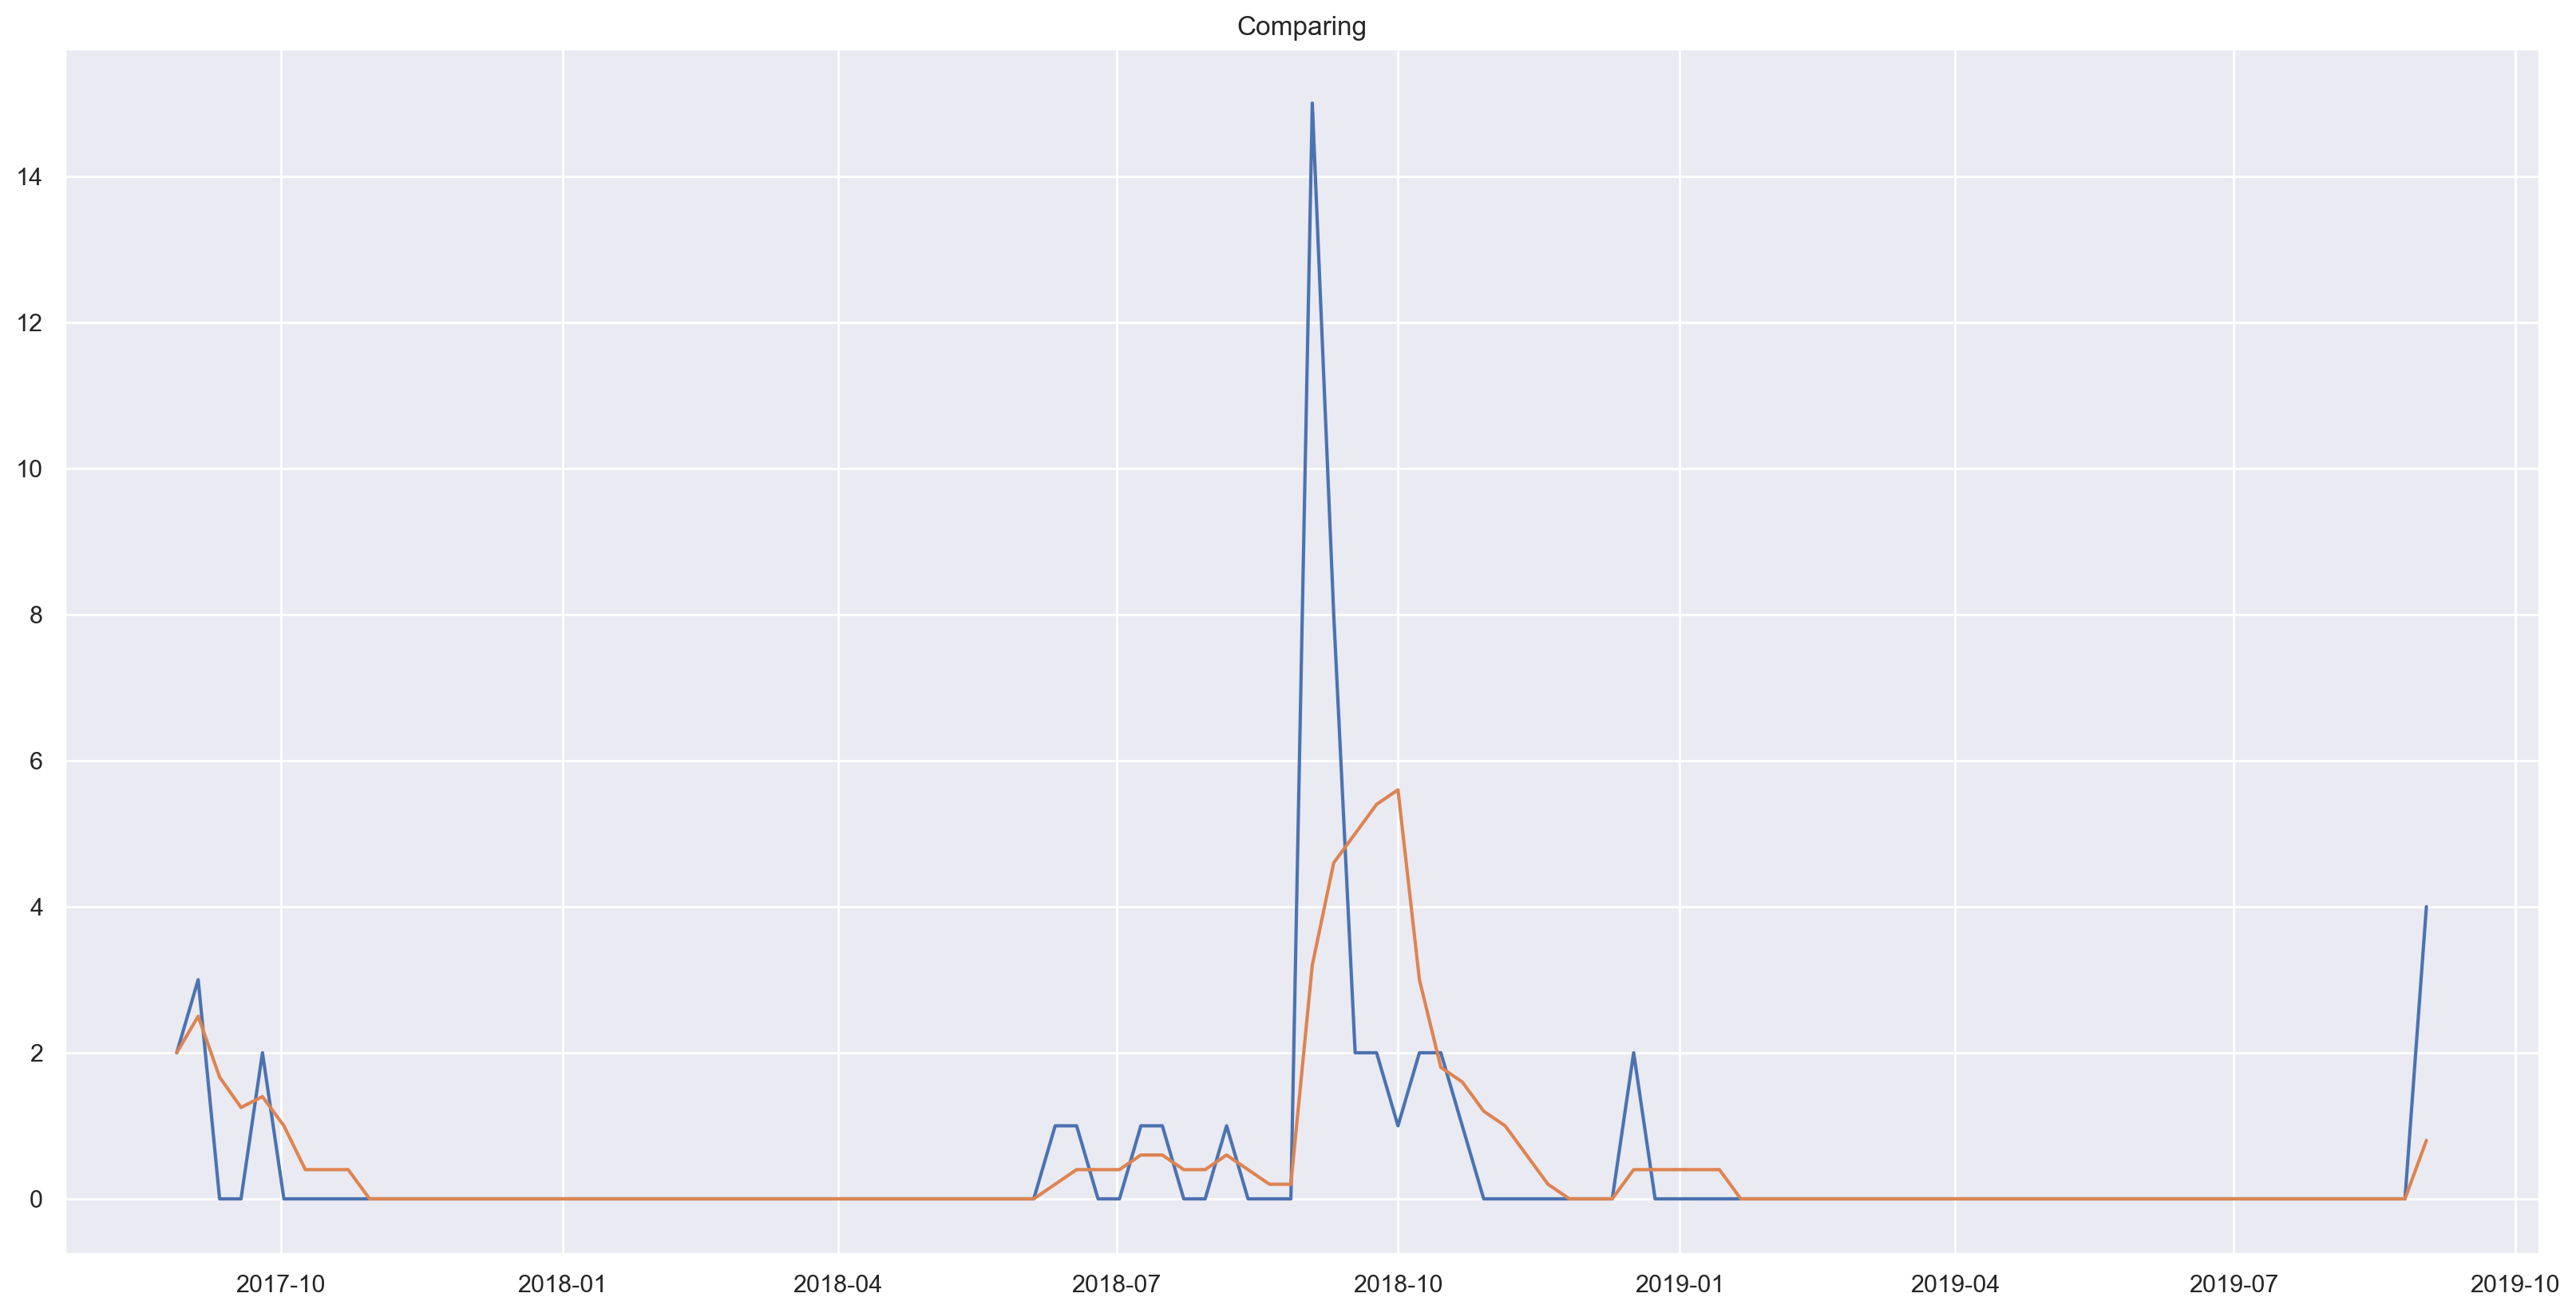

In [10]:
plot('Comparing', df['item0'], rolling_df['item0'])

In [11]:
df_mean = df.expanding().mean()
df_std = df.expanding().std()

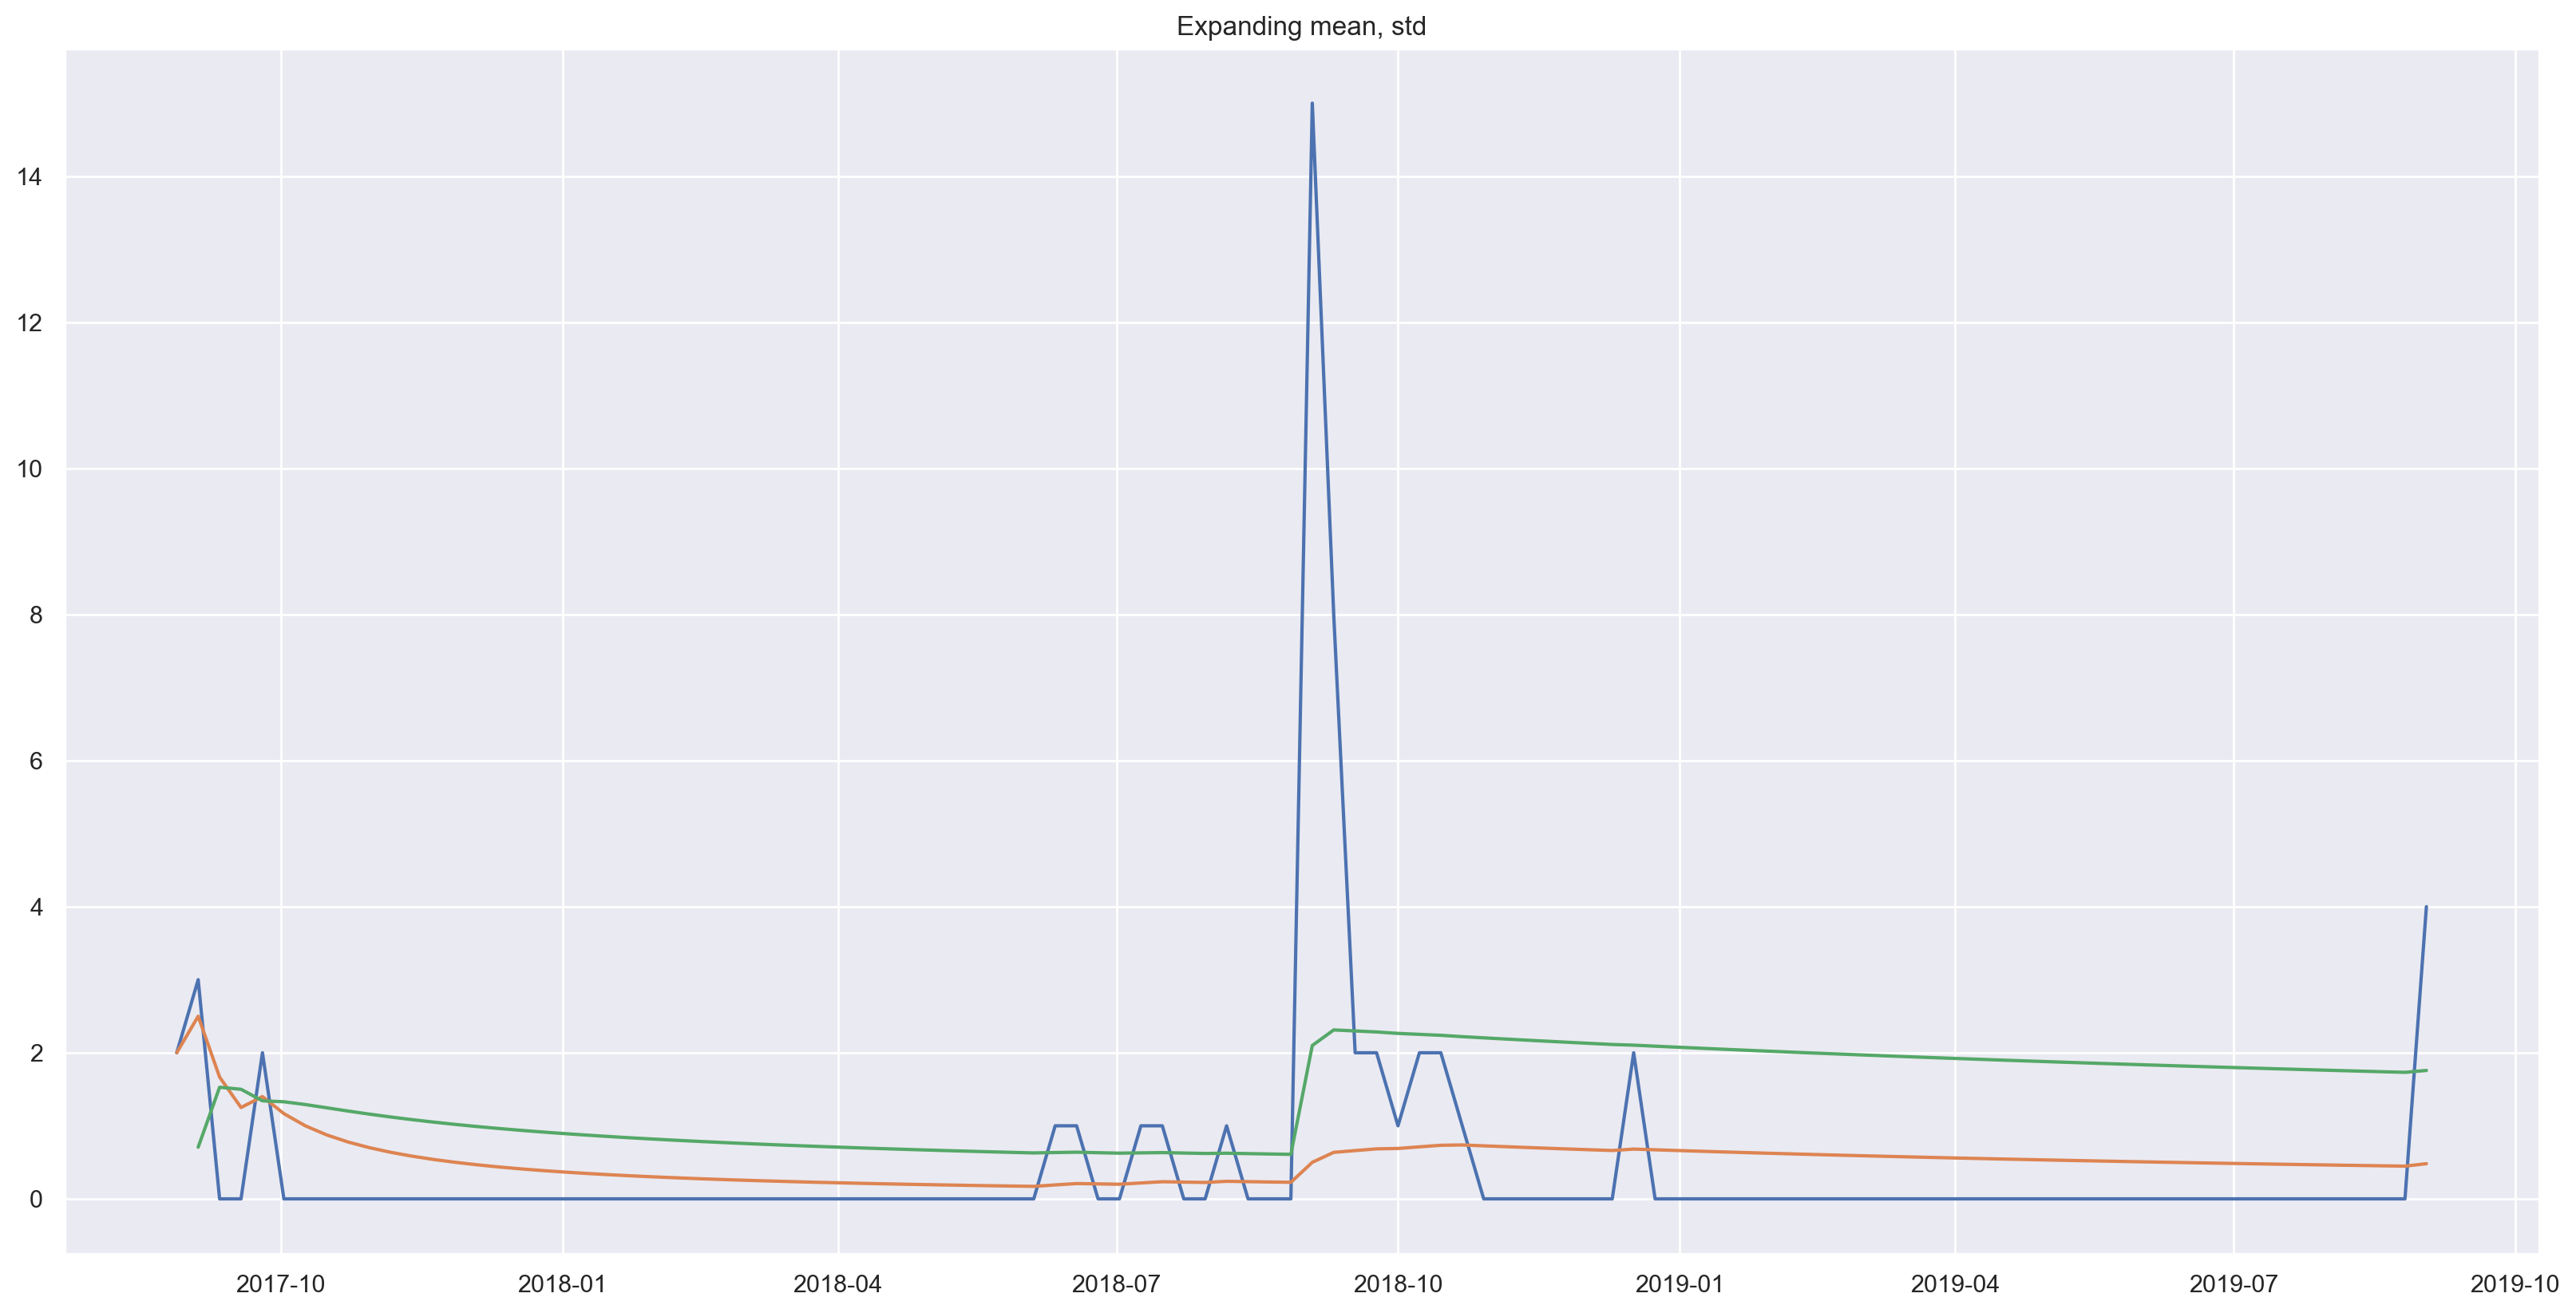

In [12]:
plot('Expanding mean, std', df['item0'], df_mean['item0'], df_std['item0'])

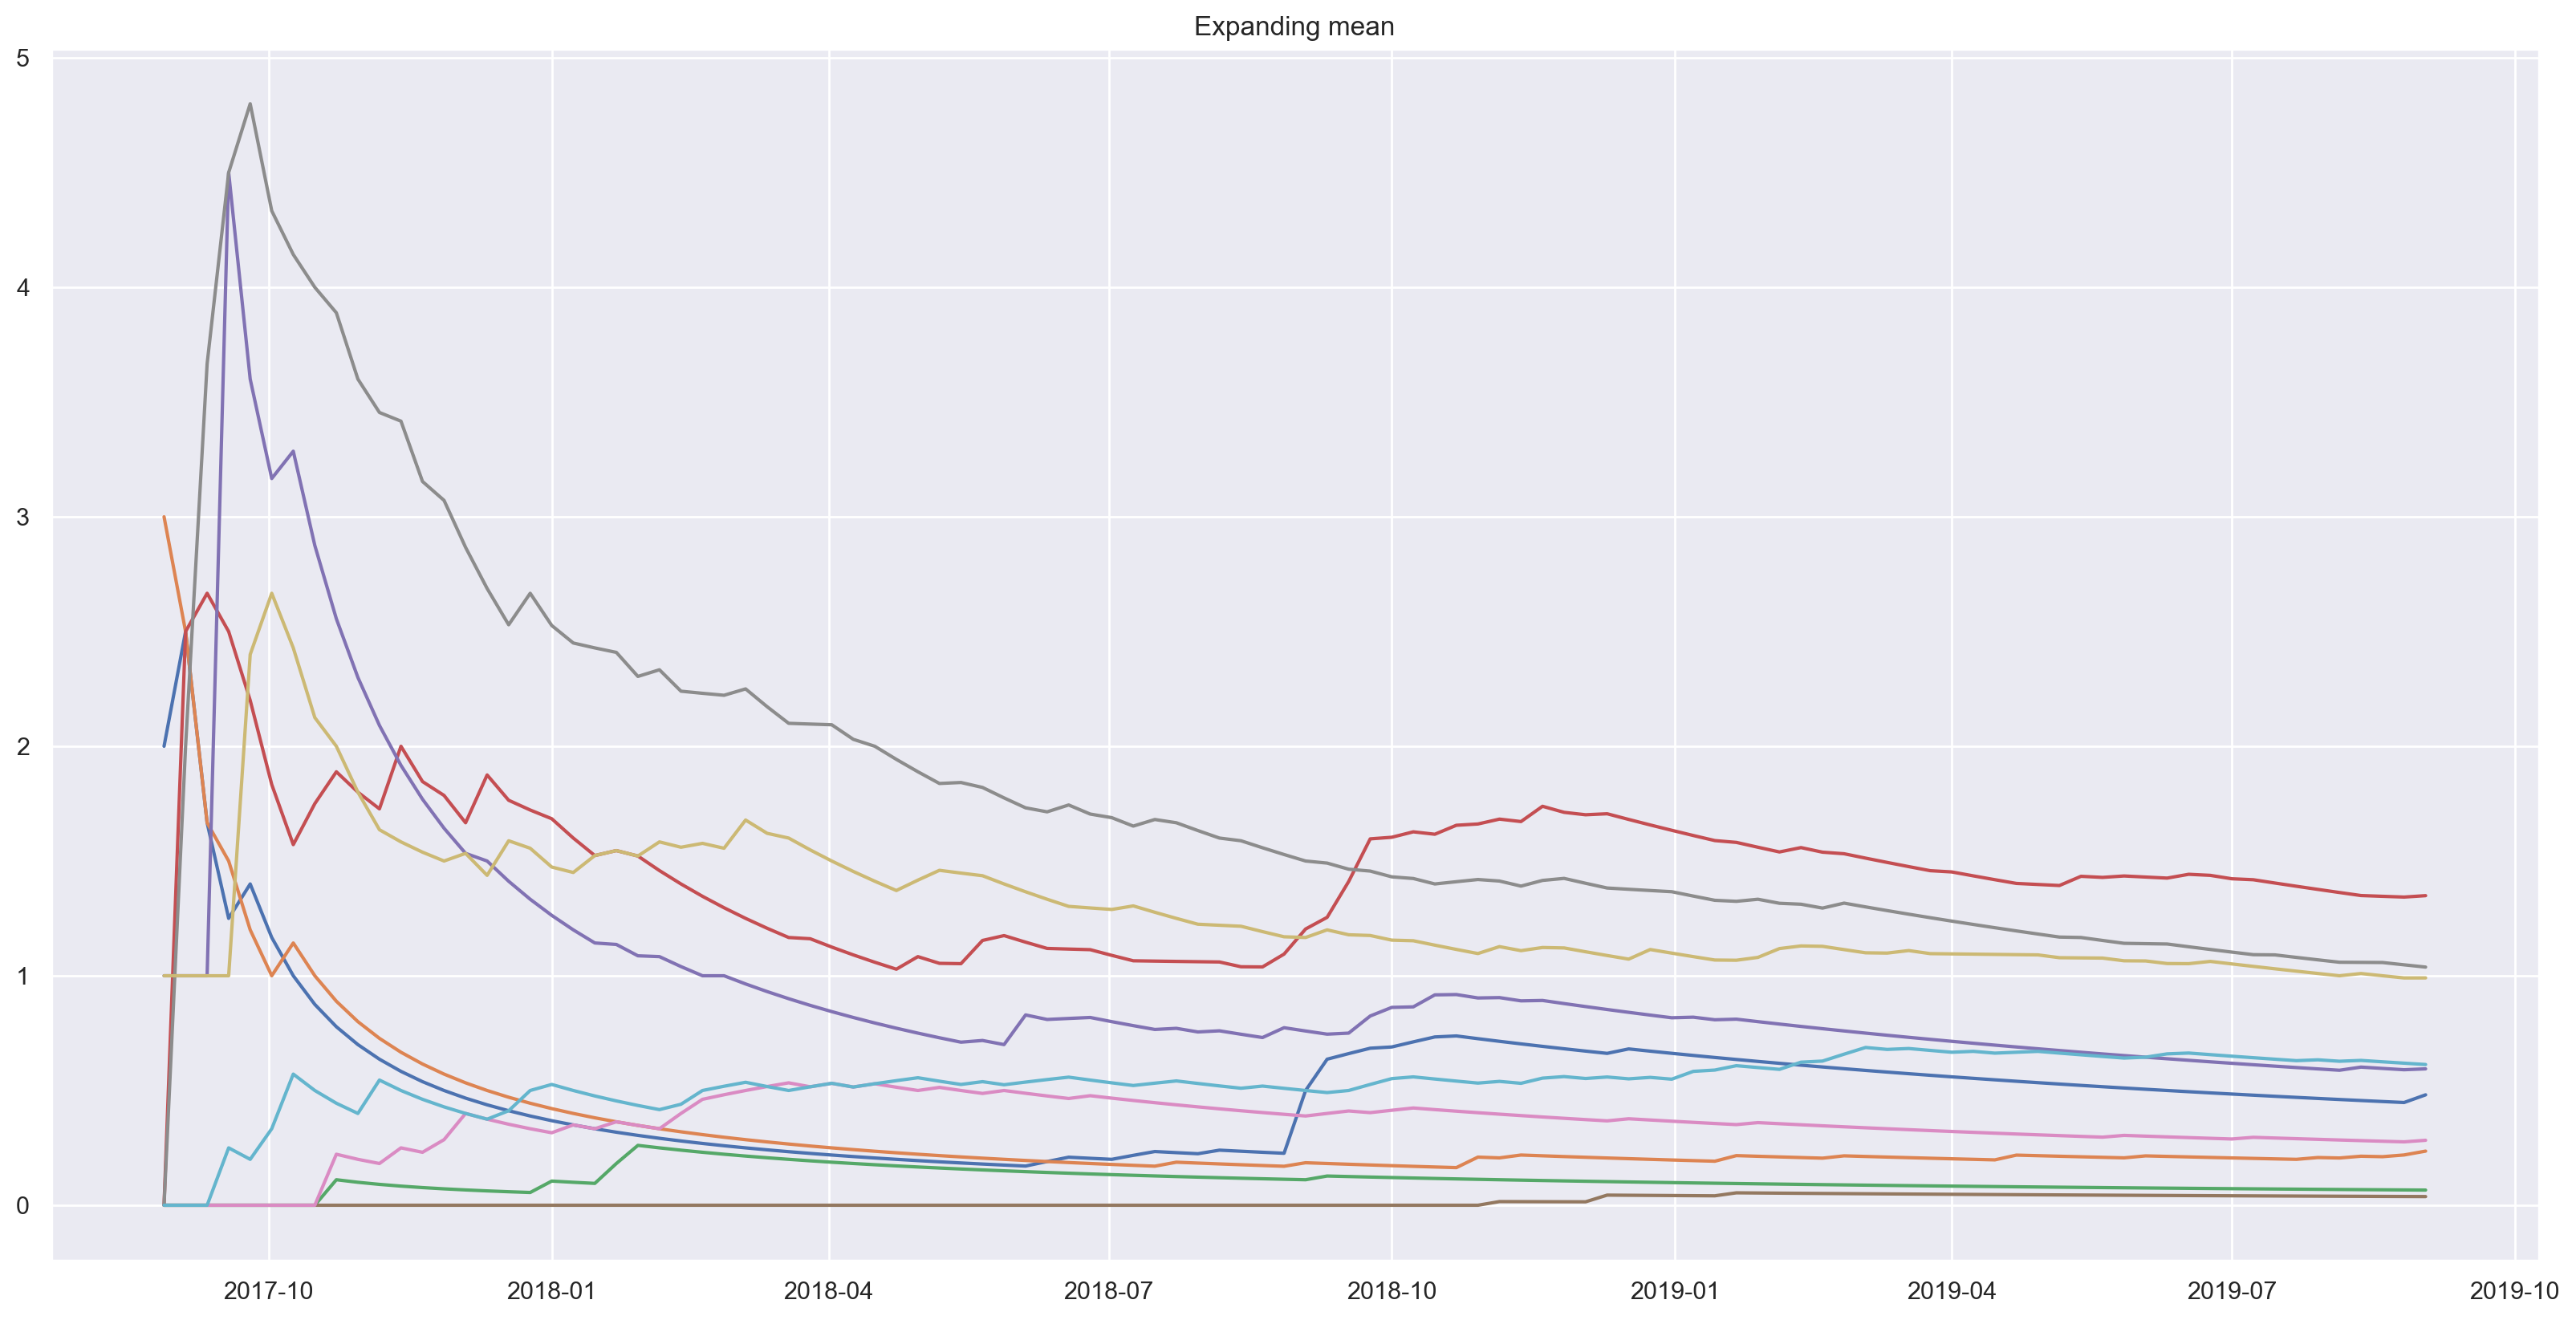

In [13]:
plot('Expanding mean', df_mean[df_mean.columns[:10]])

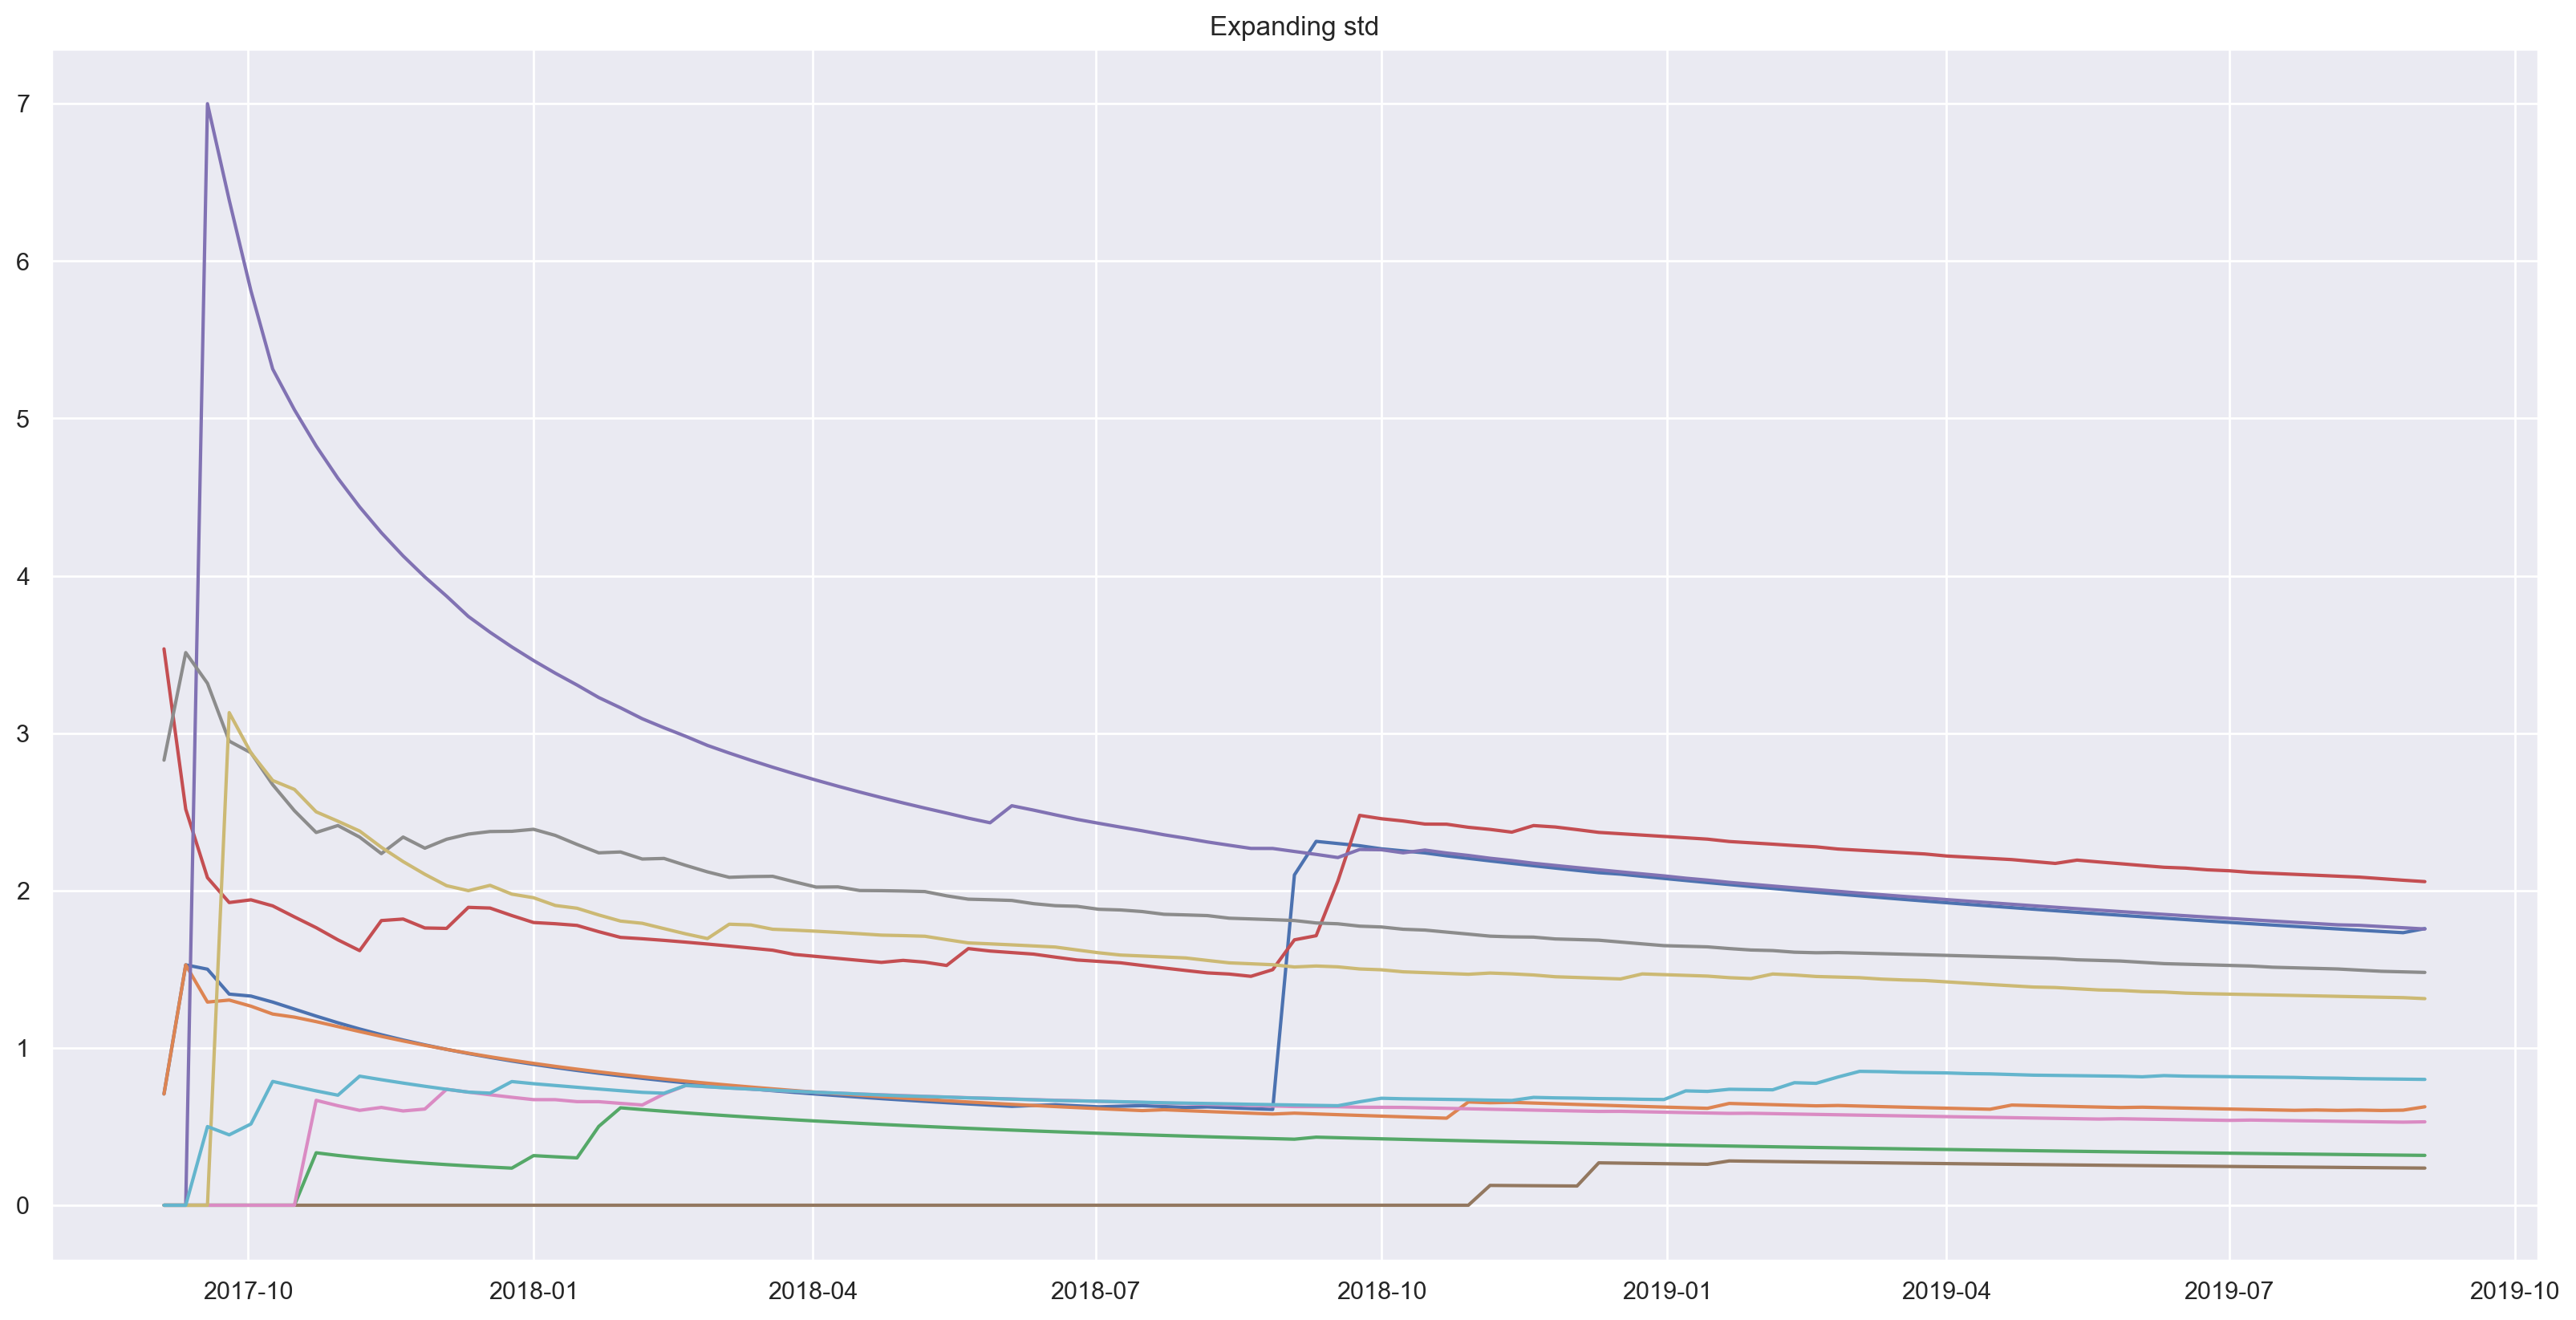

In [14]:
plot('Expanding std', df_std[df_std.columns[:10]])

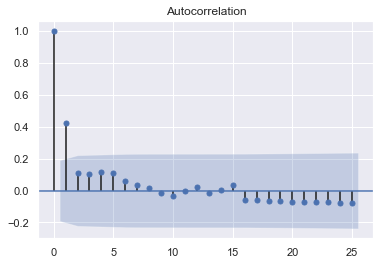

In [15]:
plot_acf(df['item0'], lags=25)
plt.show()

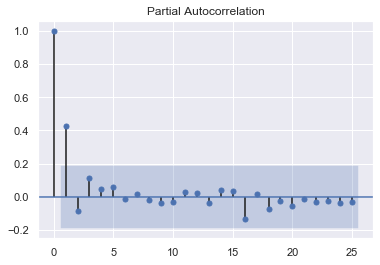

In [16]:
plot_pacf(df['item0'], lags=25)
plt.show()

In [17]:
rcParams['figure.figsize'] = 20, 9

decomposed_df_volume = [sm.tsa.seasonal_decompose(df[col]) for col in tqdm(df.columns)]

100%|██████████| 58424/58424 [01:55<00:00, 504.40it/s]


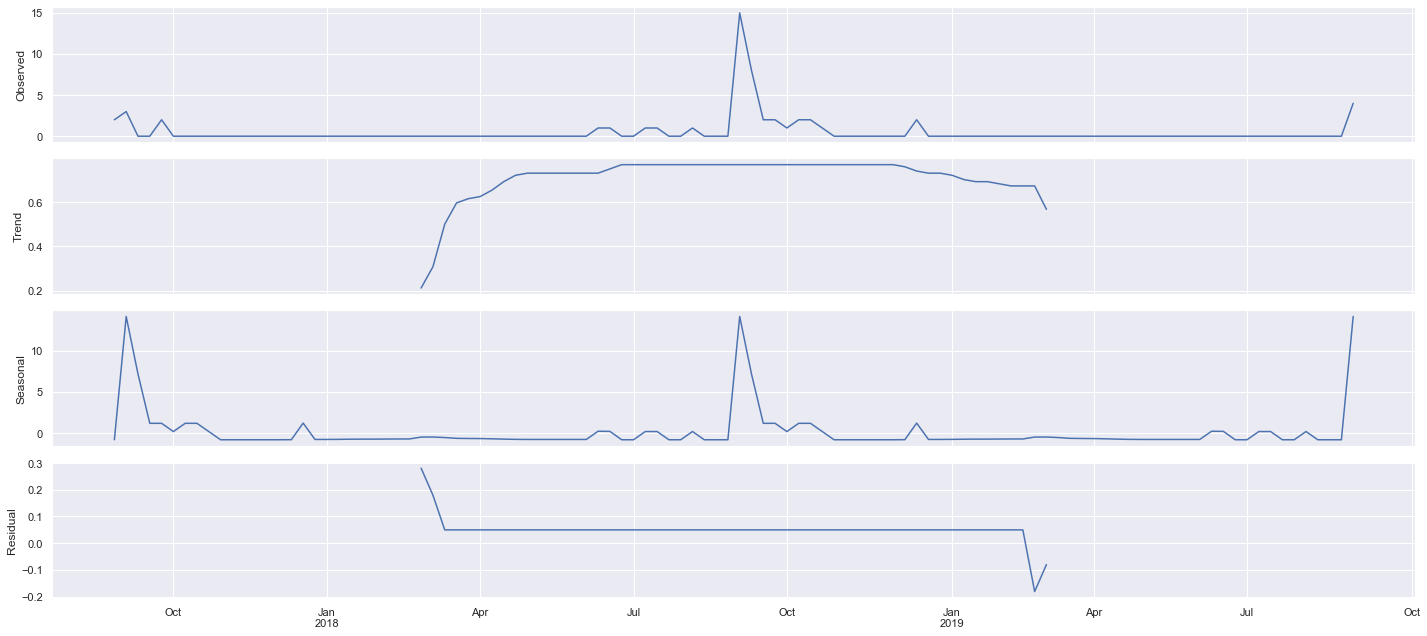

In [18]:
figure = decomposed_df_volume[0].plot()

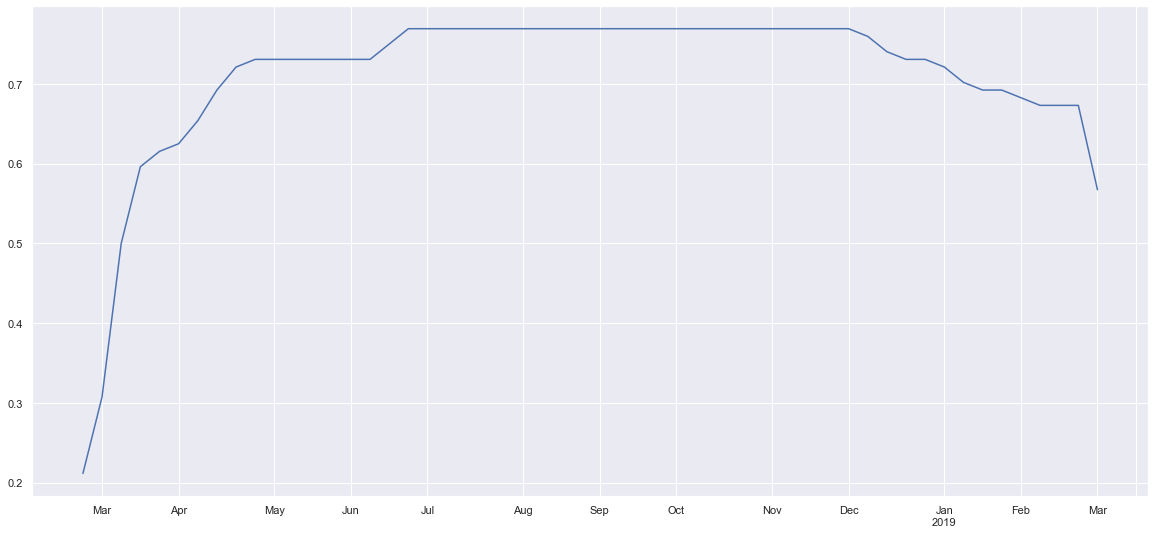

In [19]:
decomposed_df_volume[0].trend.plot()

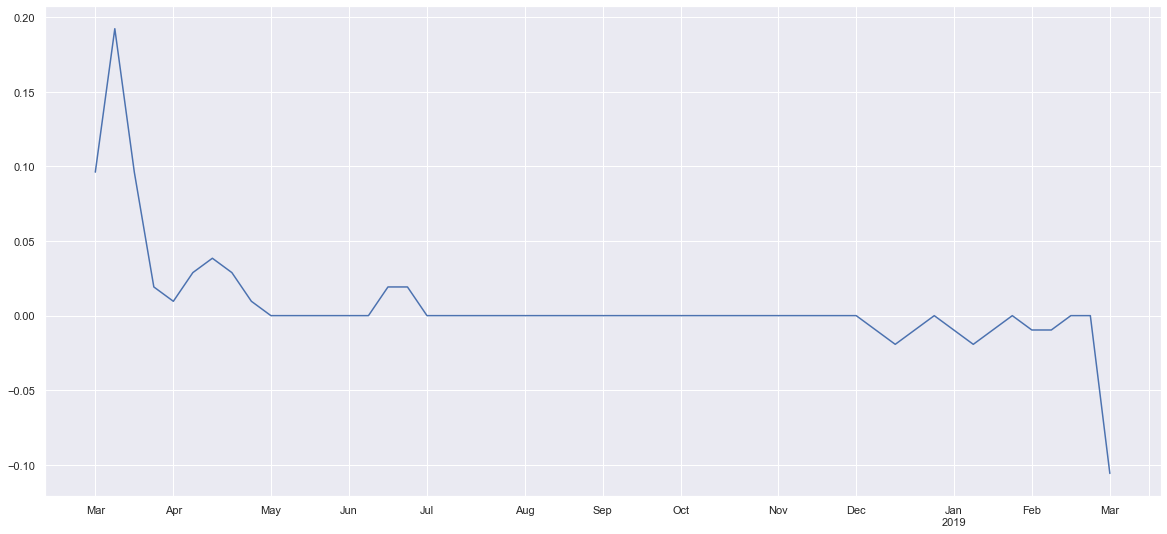

In [20]:
decomposed_df_volume[0].trend.diff().plot()

In [32]:
from sklearn.cluster import KMeans, DBSCAN, affinity_propagation, AgglomerativeClustering, MiniBatchKMeans

In [22]:
km = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred = km.fit_predict(df.T)

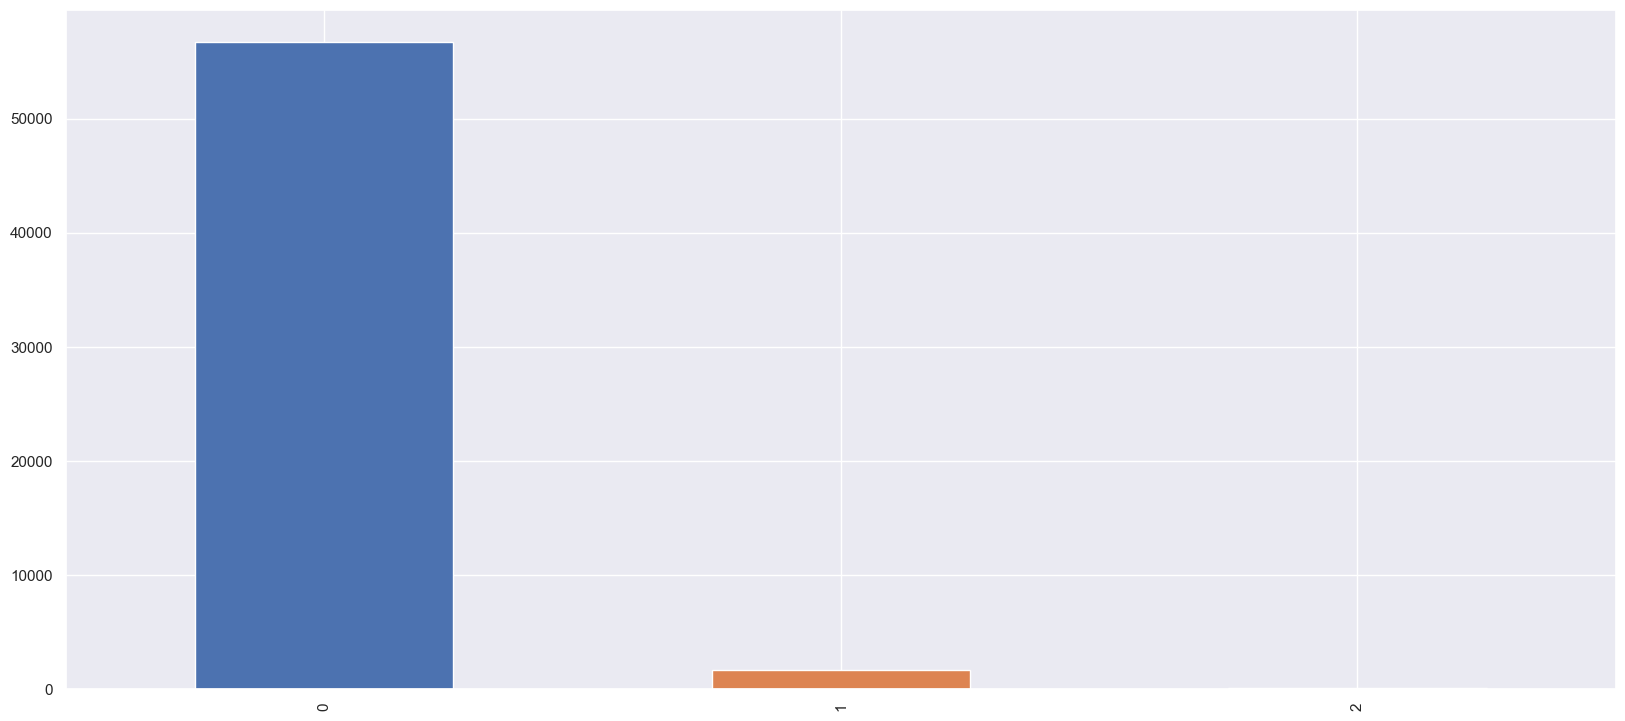

0    56697
1     1648
2       79
dtype: int64

In [23]:
plt.figure(dpi=100)
pd.Series(y_pred).value_counts().plot.bar()
plt.show()
pd.Series(y_pred).value_counts()

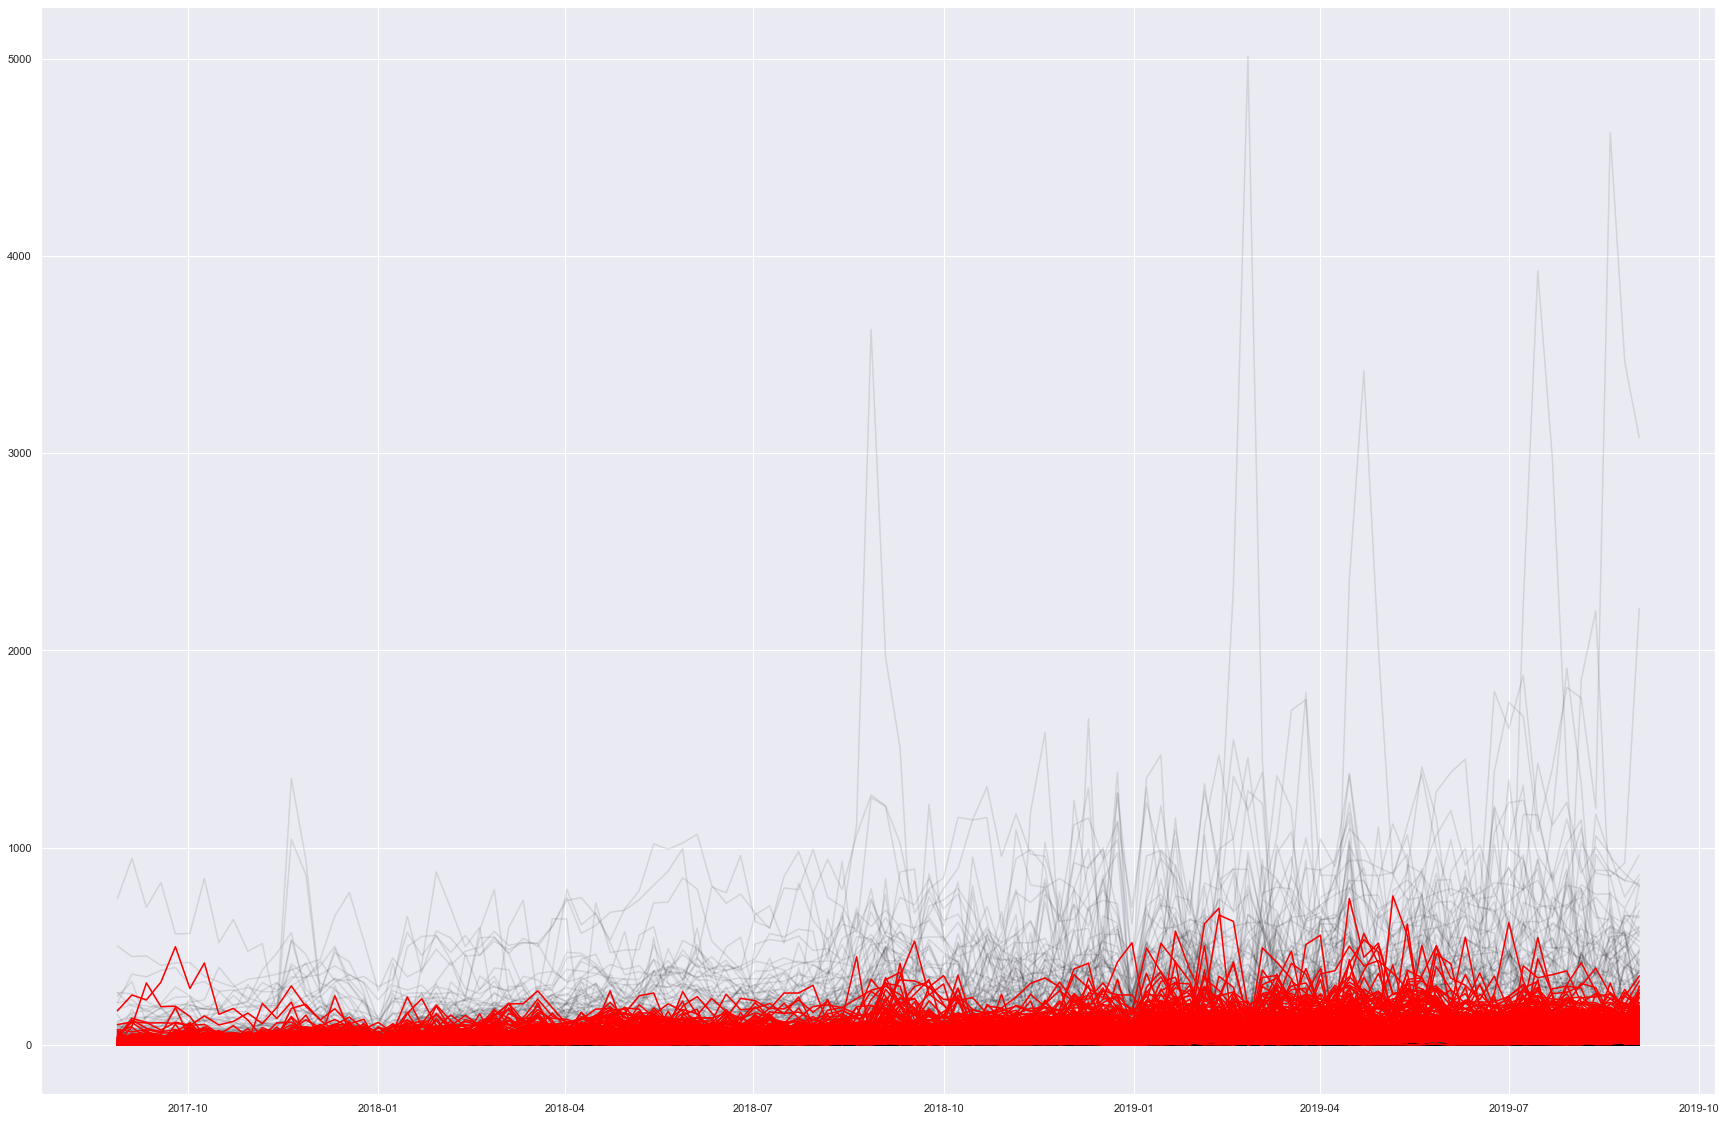

In [106]:
plot_claster(df, 3, y_pred, 1)

In [27]:
# hr = AgglomerativeClustering(n_clusters=4)
# y_pred1 = hr.fit_predict(df.T)

In [28]:
# plt.figure(dpi=100)
# pd.Series(y_pred1).value_counts().plot.bar()
# plt.show()
# pd.Series(y_pred1).value_counts()

In [29]:
rol_y_pred = km.fit_predict(rolling_df.T)

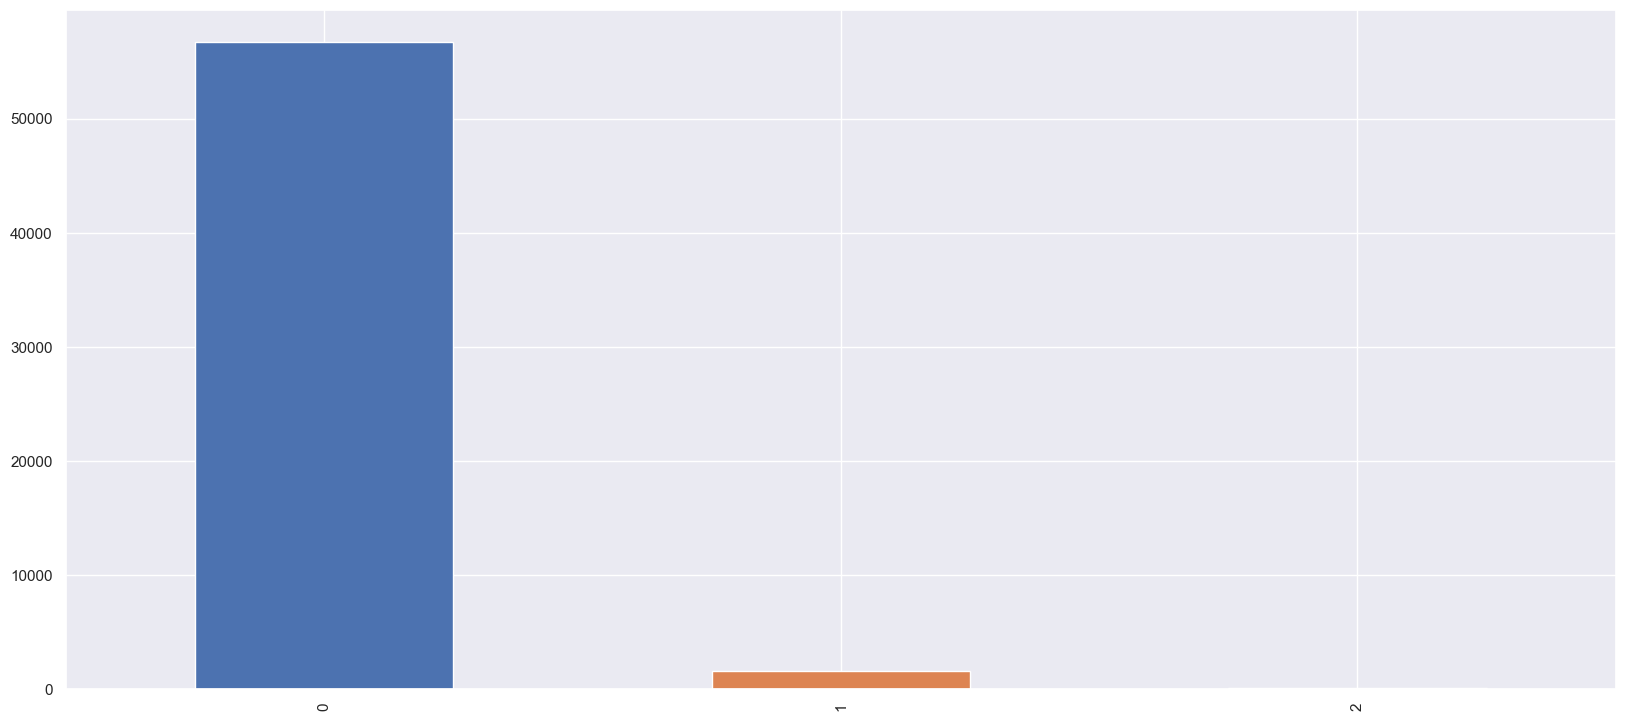

0    56710
1     1634
2       80
dtype: int64

In [30]:
plt.figure(dpi=100)
pd.Series(rol_y_pred).value_counts().plot.bar()
plt.show()
pd.Series(rol_y_pred).value_counts()

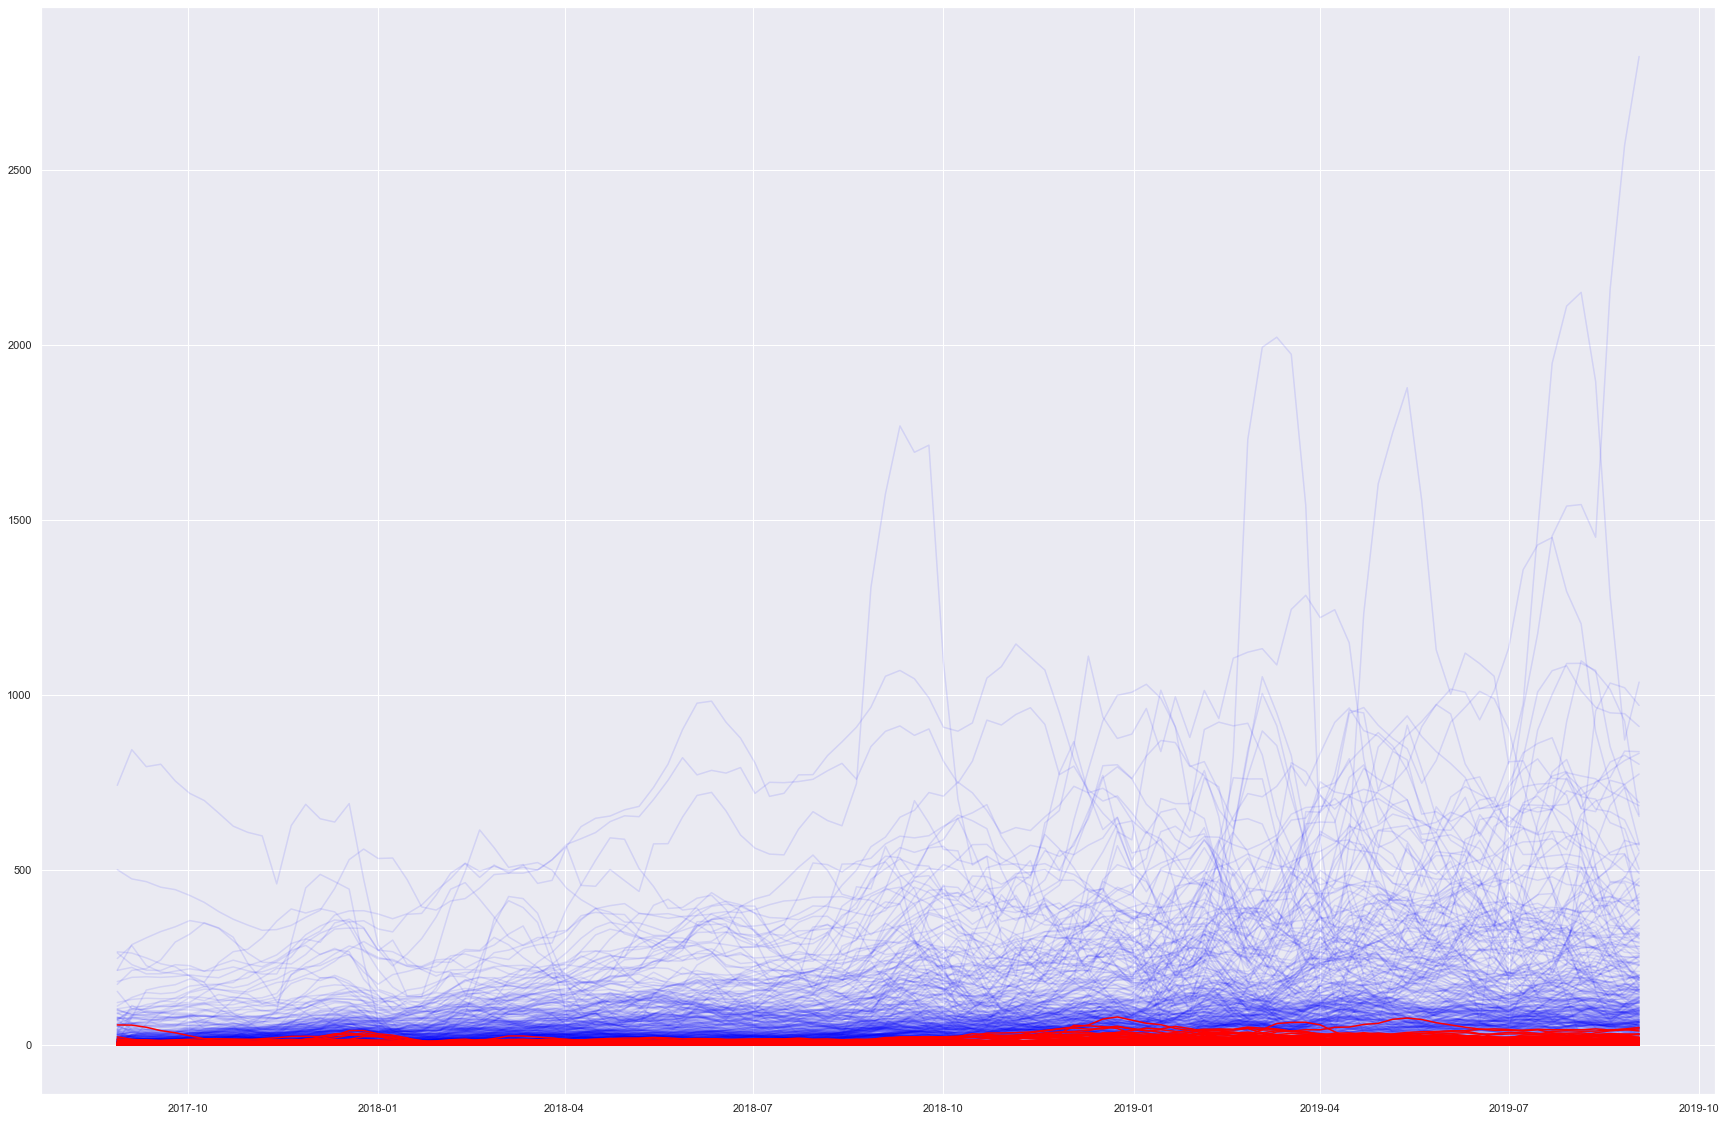

In [33]:
plot_claster(rolling_df, 3, rol_y_pred, 0)

In [43]:
expm_y_pred = km.fit_predict(df_mean.T)

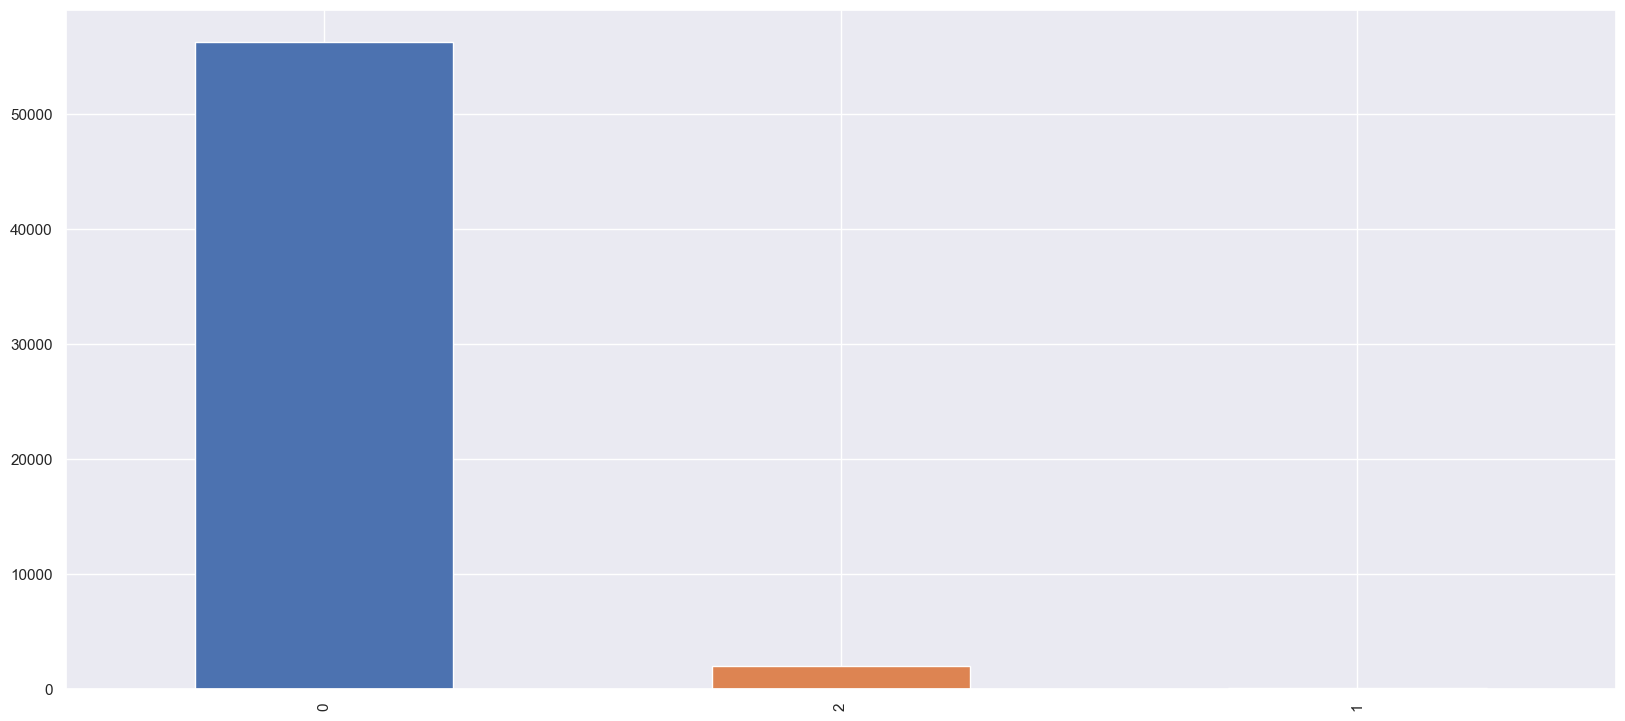

0    56285
2     2028
1      111
dtype: int64

In [45]:
plt.figure(dpi=100)
pd.Series(expm_y_pred).value_counts().plot.bar()
plt.show() 
pd.Series(expm_y_pred).value_counts()

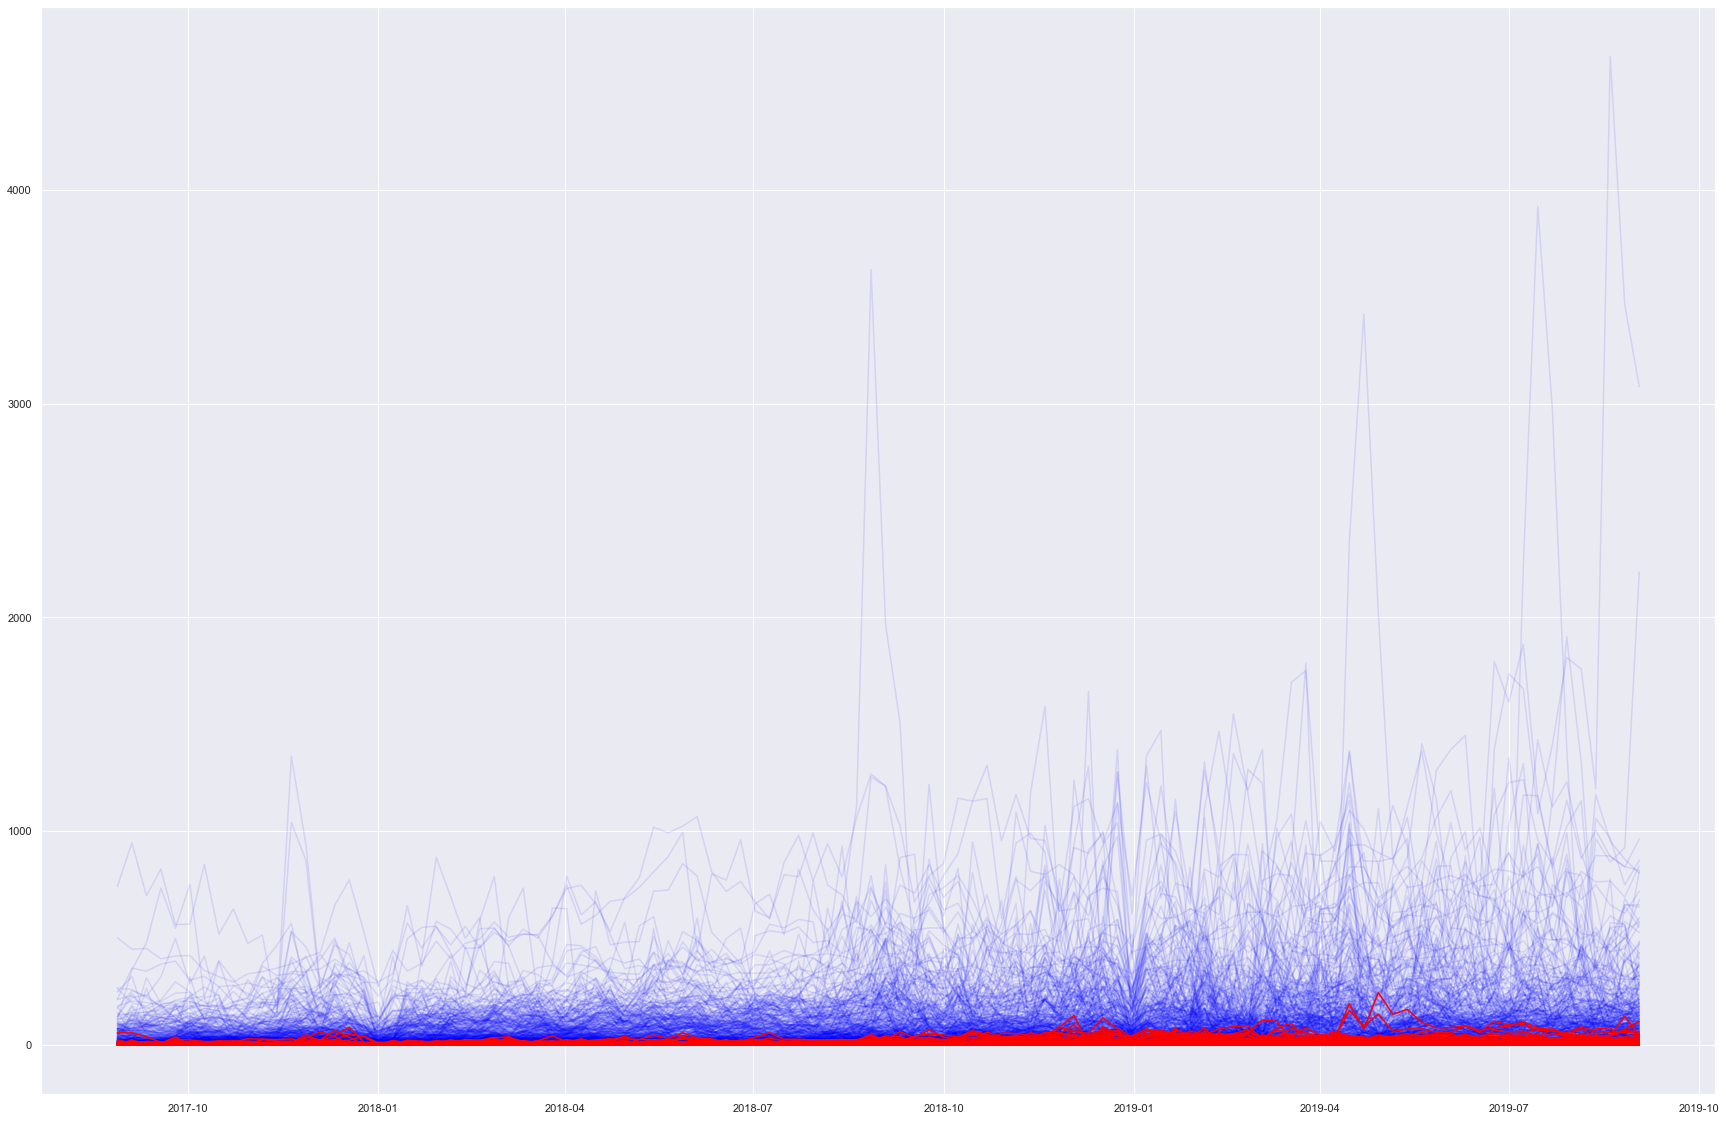

In [100]:
plot_claster(df, 3, expm_y_pred, 0)

In [54]:
exps_y_pred = km.fit_predict(df_std[1:].T)

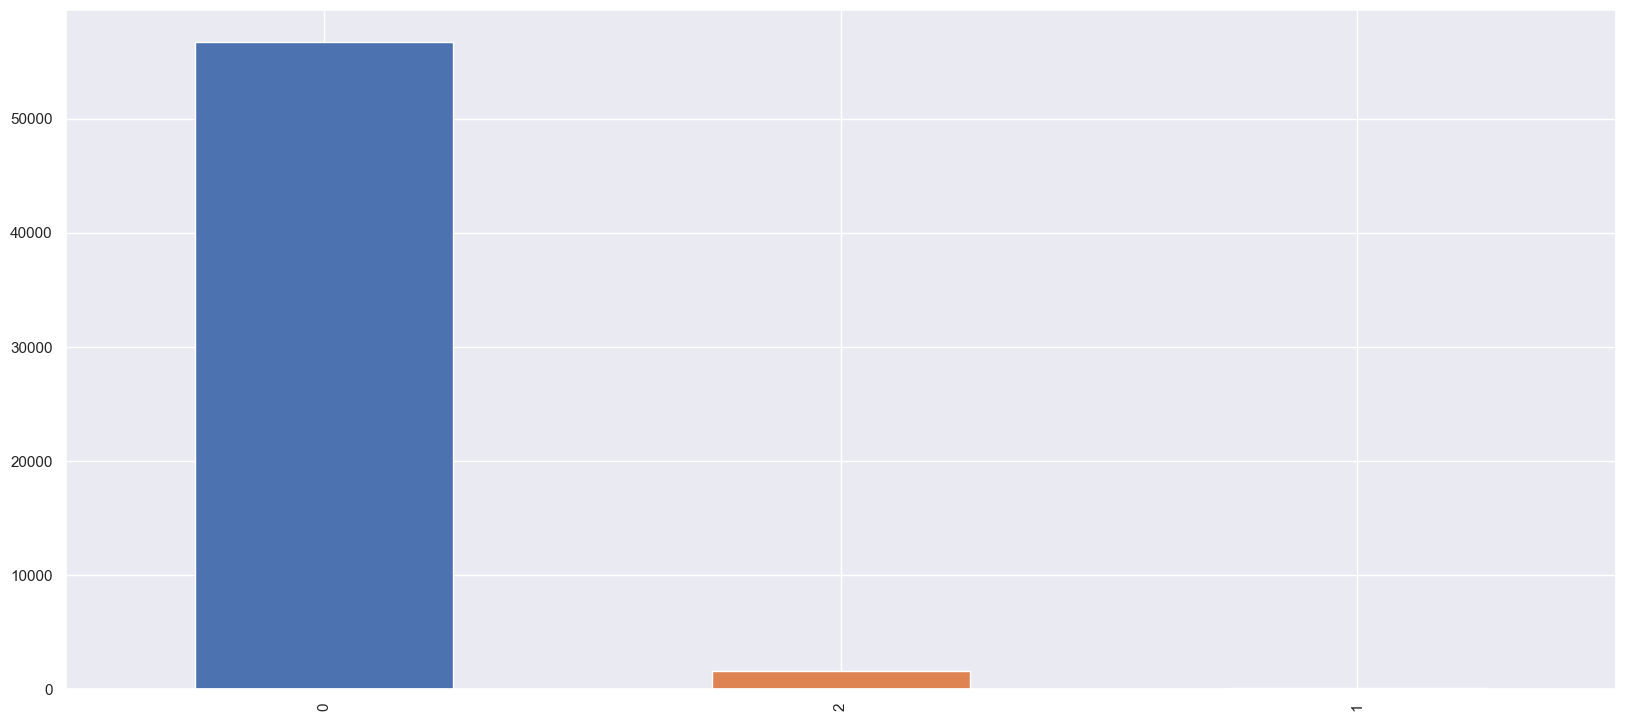

0    56702
2     1642
1       80
dtype: int64

In [55]:
plt.figure(dpi=100)
pd.Series(exps_y_pred).value_counts().plot.bar()
plt.show() 
pd.Series(exps_y_pred).value_counts()

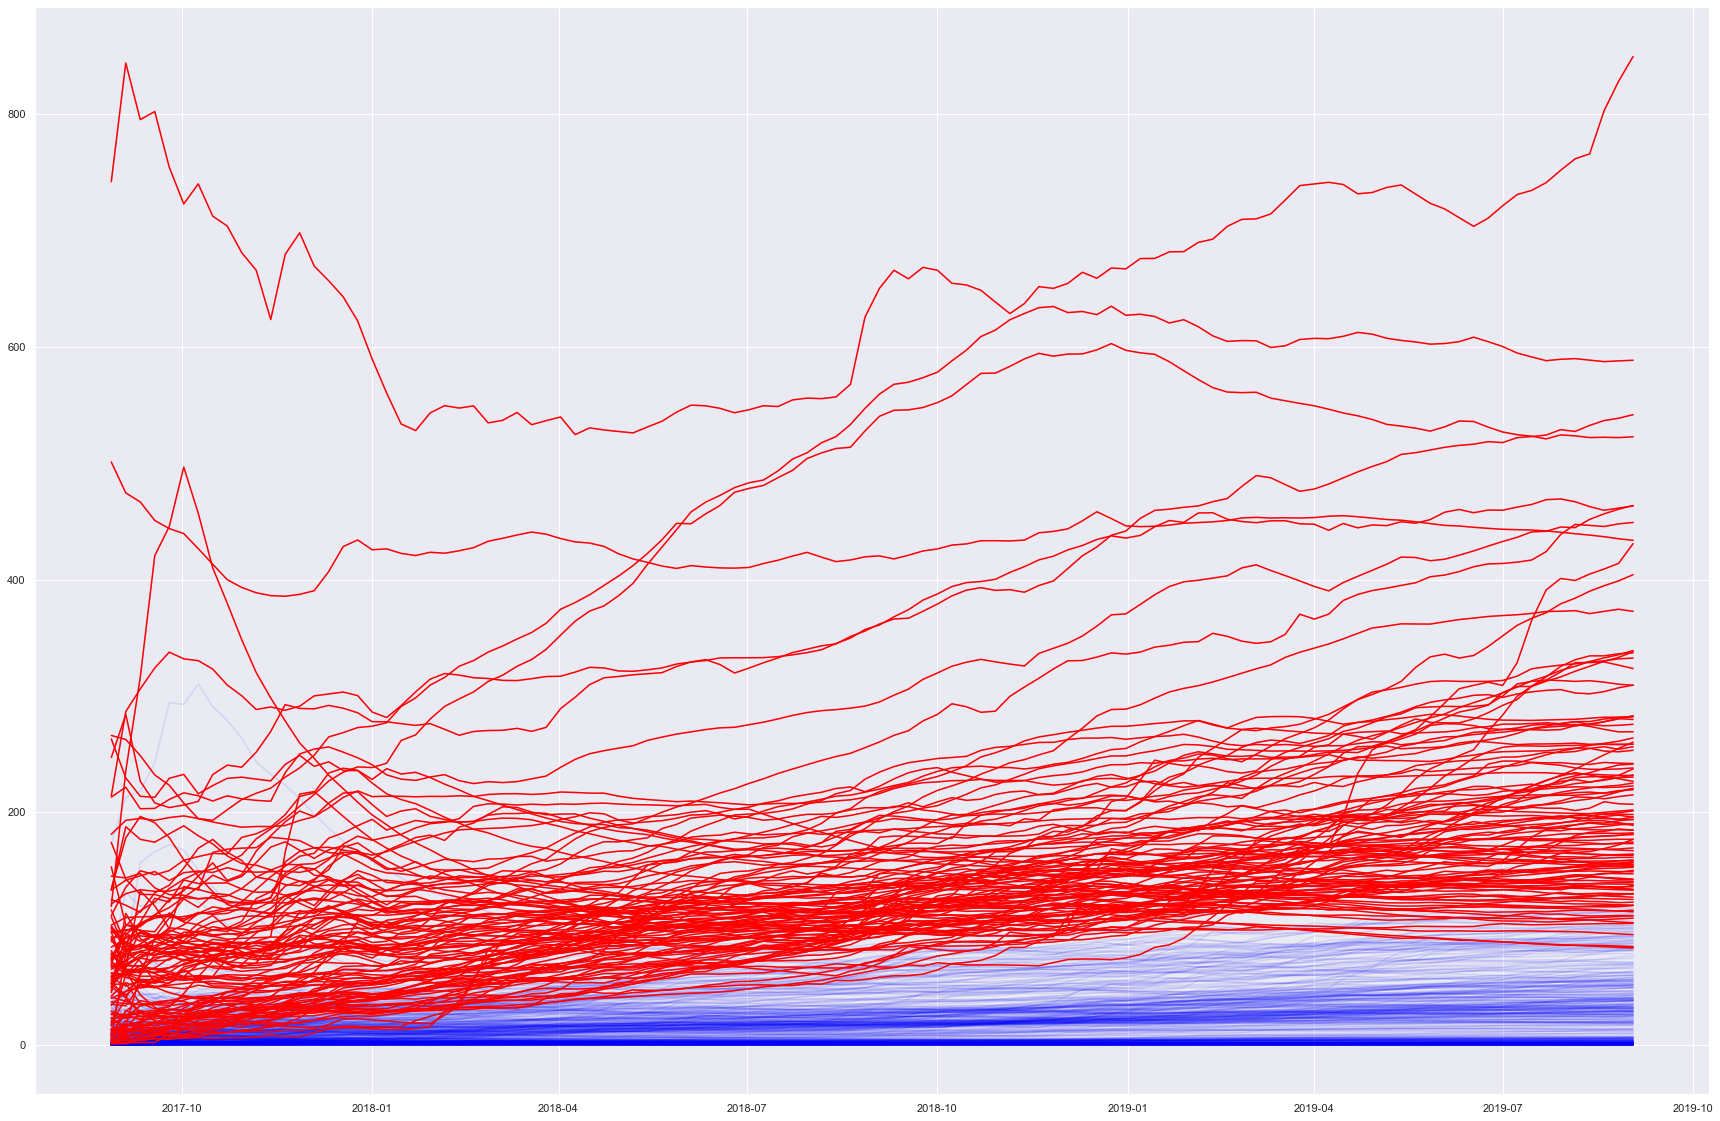

In [56]:
plot_claster(df_mean, 3, expm_y_pred, 1)

In [61]:
mbkm = MiniBatchKMeans(n_clusters=3, init='k-means++', random_state=42)
m_y_pred = mbkm.fit_predict(df.T)

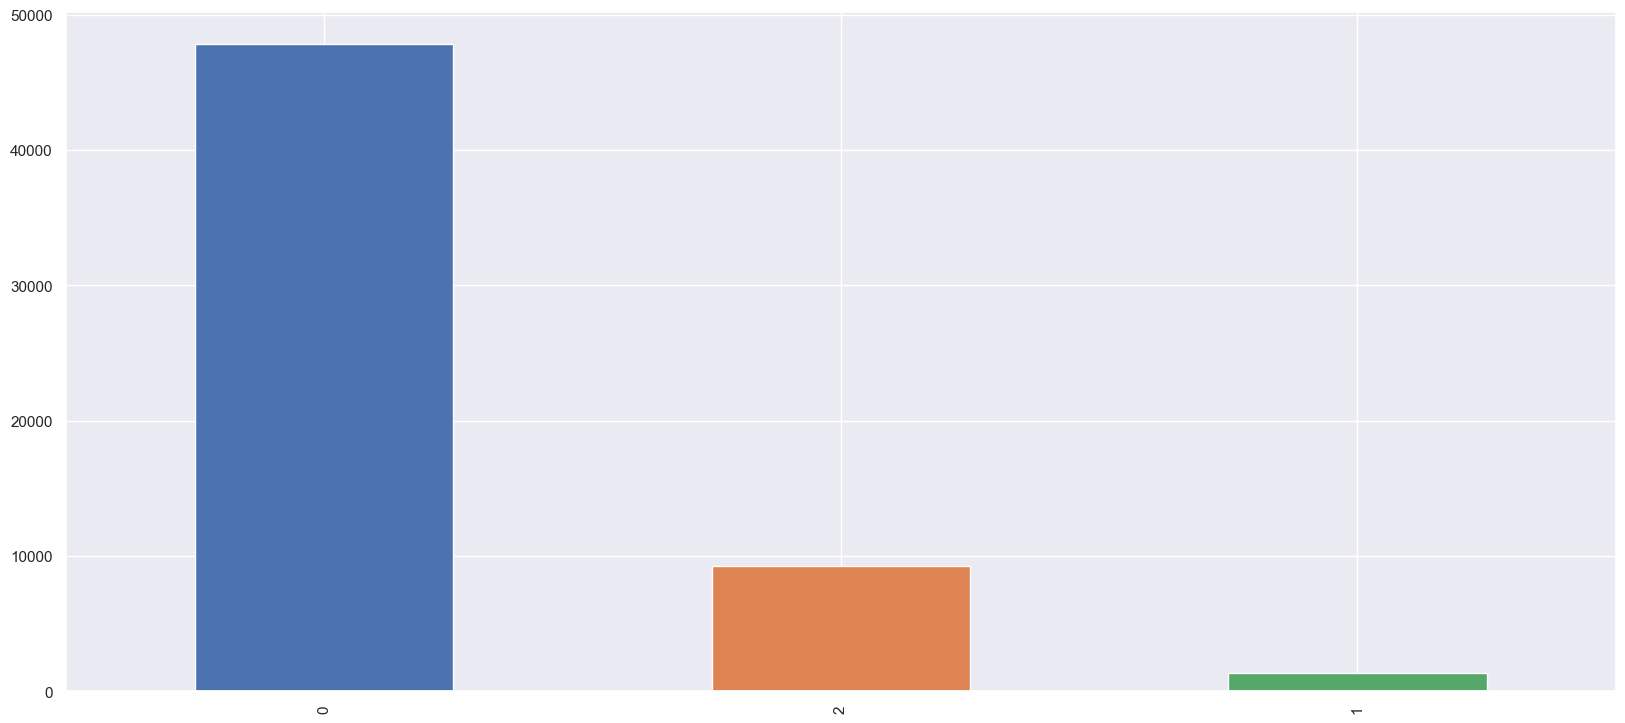

0    47818
2     9247
1     1359
dtype: int64

In [62]:
plt.figure(dpi=100)
pd.Series(m_y_pred).value_counts().plot.bar()
plt.show() 
pd.Series(m_y_pred).value_counts()

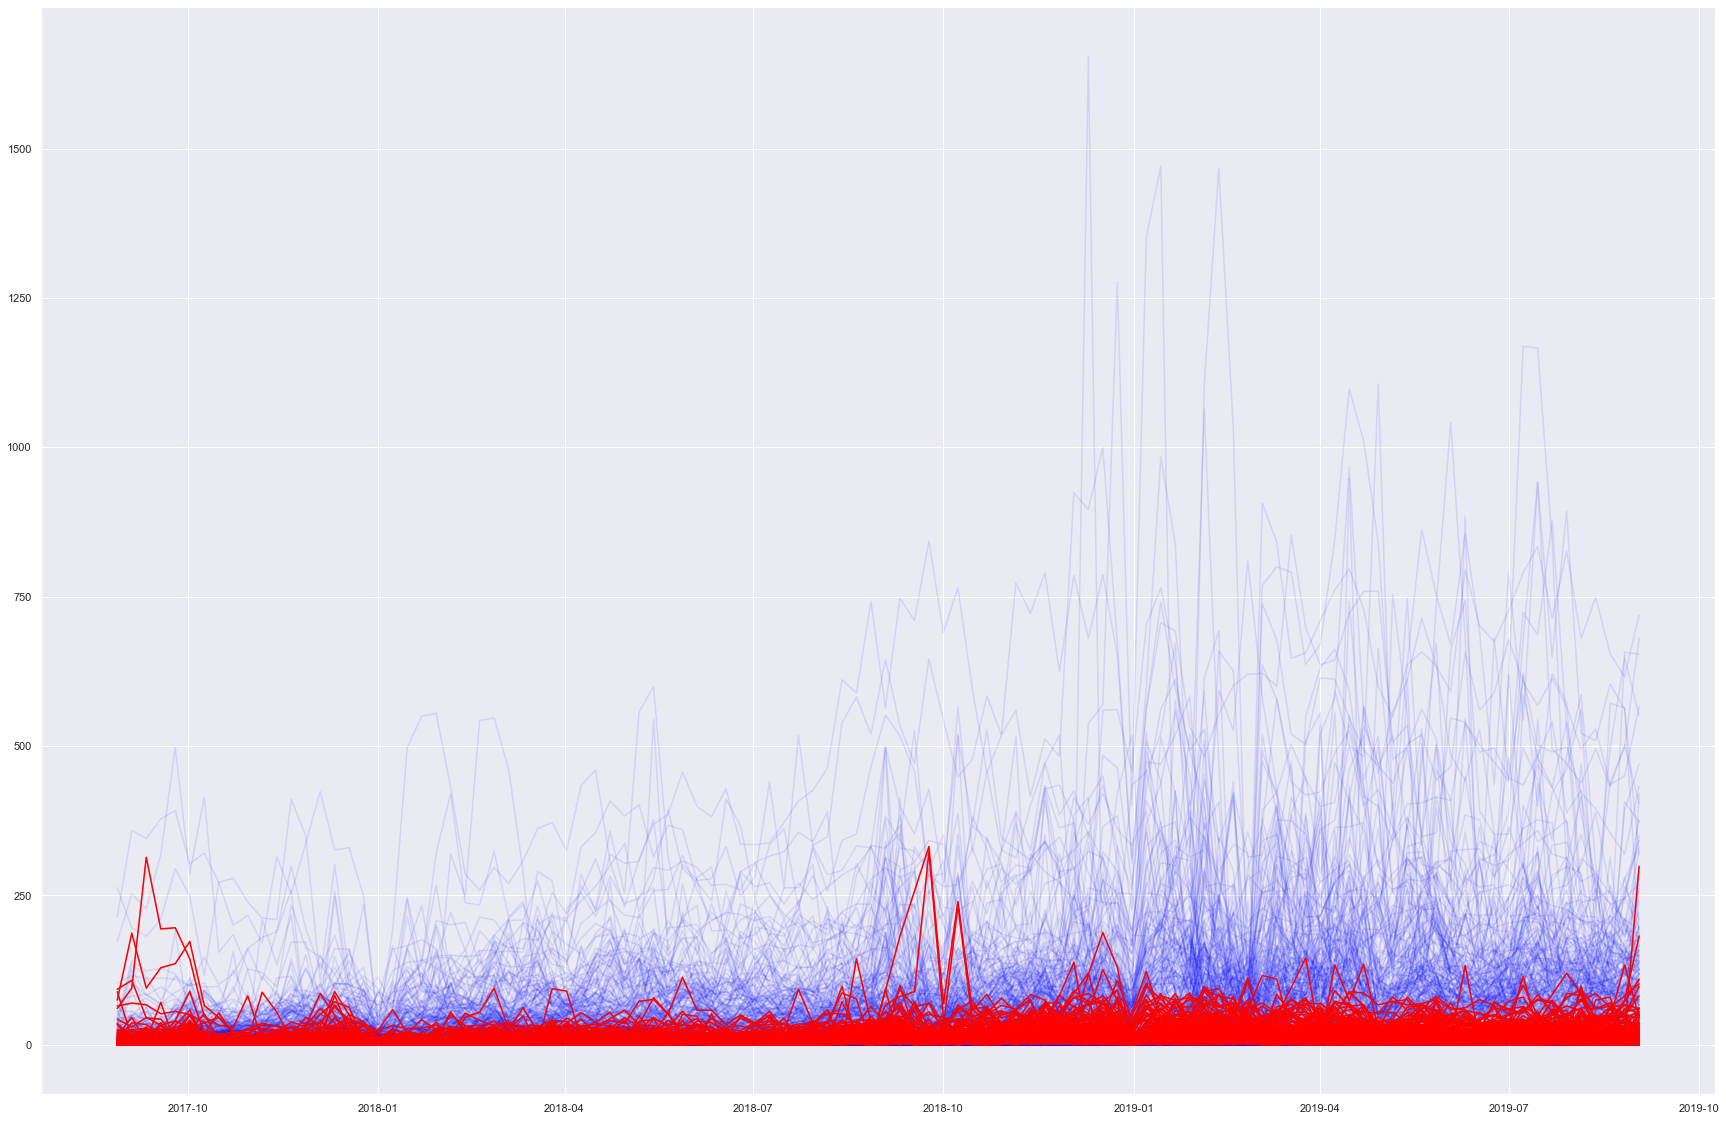

In [103]:
plot_claster(df, 3, m_y_pred, 2)

In [96]:
trends = [series.trend for series in decomposed_df_volume]